ABM simulations outputs 3 types of results by default


**Stocks** - # people w/ active infection on a given day

**Flows** - new infections on a given day

**Cumulative flows** - cumulative num infections up to a given day


In [ ]:
#pop_size = 10000, # Population sizepop_infected = 10, # Number of initial infections
#rand_seed = 1, # Random seed for reproducibility
#n_days = 120, # Number of days to simulate
#pop_type = 'hybrid', # Type of population to create
#location = 'USA-California'

In [ ]:
#pop_size = 40,000,000, # Population sizepop_infected = 10, # Number of initial infections
#rand_seed = 1, # Random seed for reproducibility
#n_days = 60, # Number of days to simulate
#pop_type = 'hybrid', # Type of population to create
#location = 'USA-California'

# Running Multiple Simulations


### Running same sim with different seeds

COVASIM allows multiple simulations to be run at the same time. It also allows you to treat each of the individual sims as part of a larger single sim, and "combine" the results into one sim.


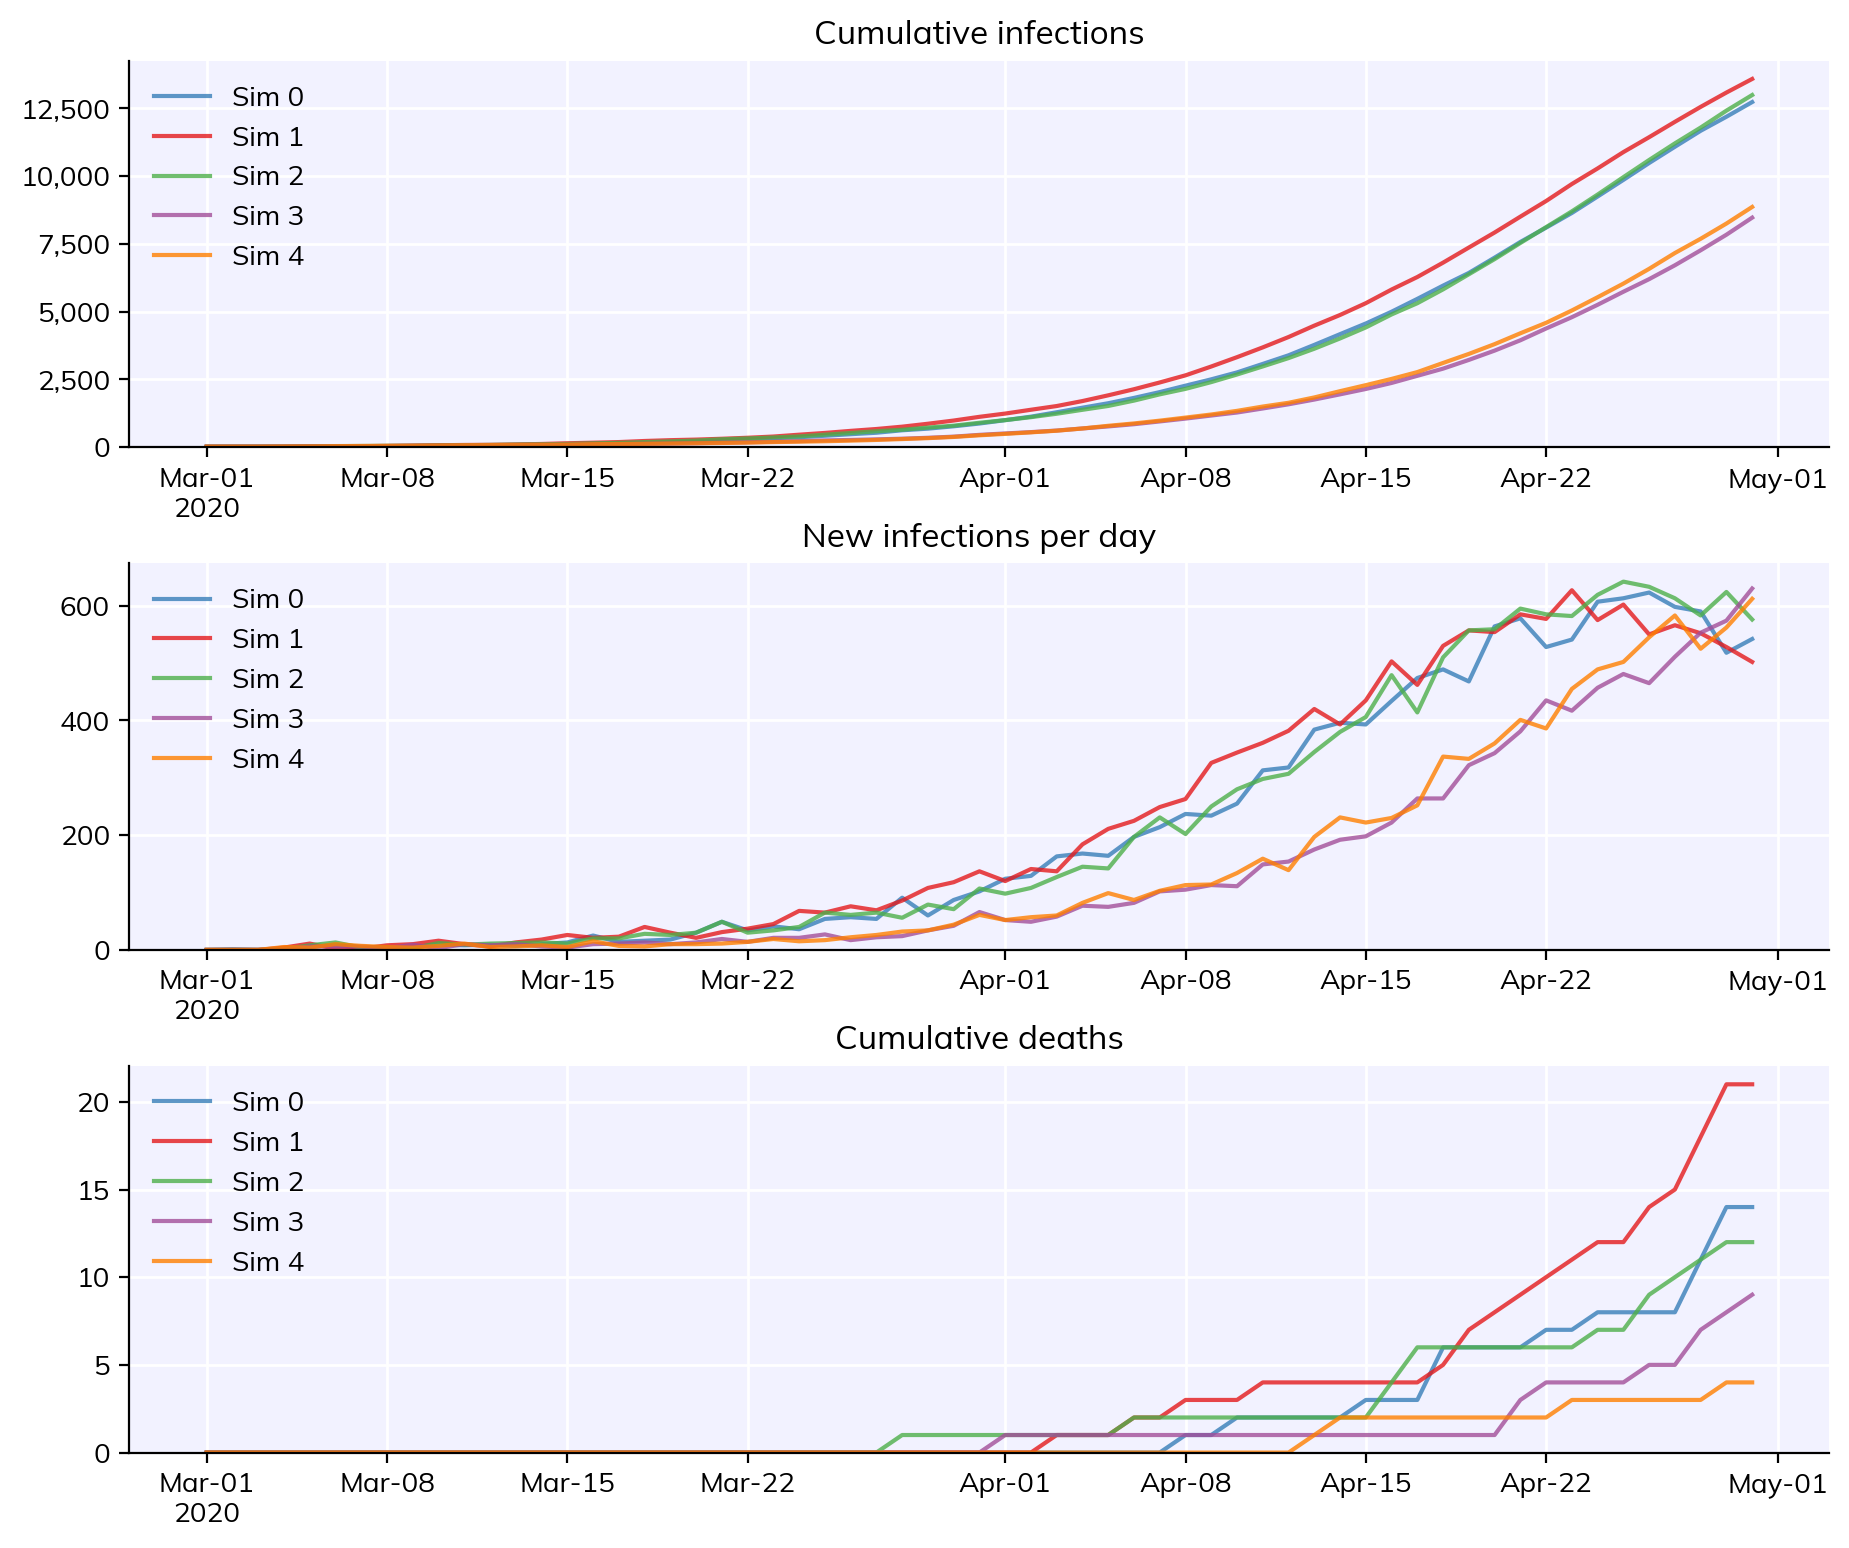

Sim("Sim 0"; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 12730⚙, 14☠)
Sim("Sim 1"; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 13582⚙, 21☠)
Sim("Sim 2"; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 12989⚙, 12☠)
Sim("Sim 3"; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 8467⚙, 9☠)
Sim("Sim 4"; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 8861⚙, 4☠)


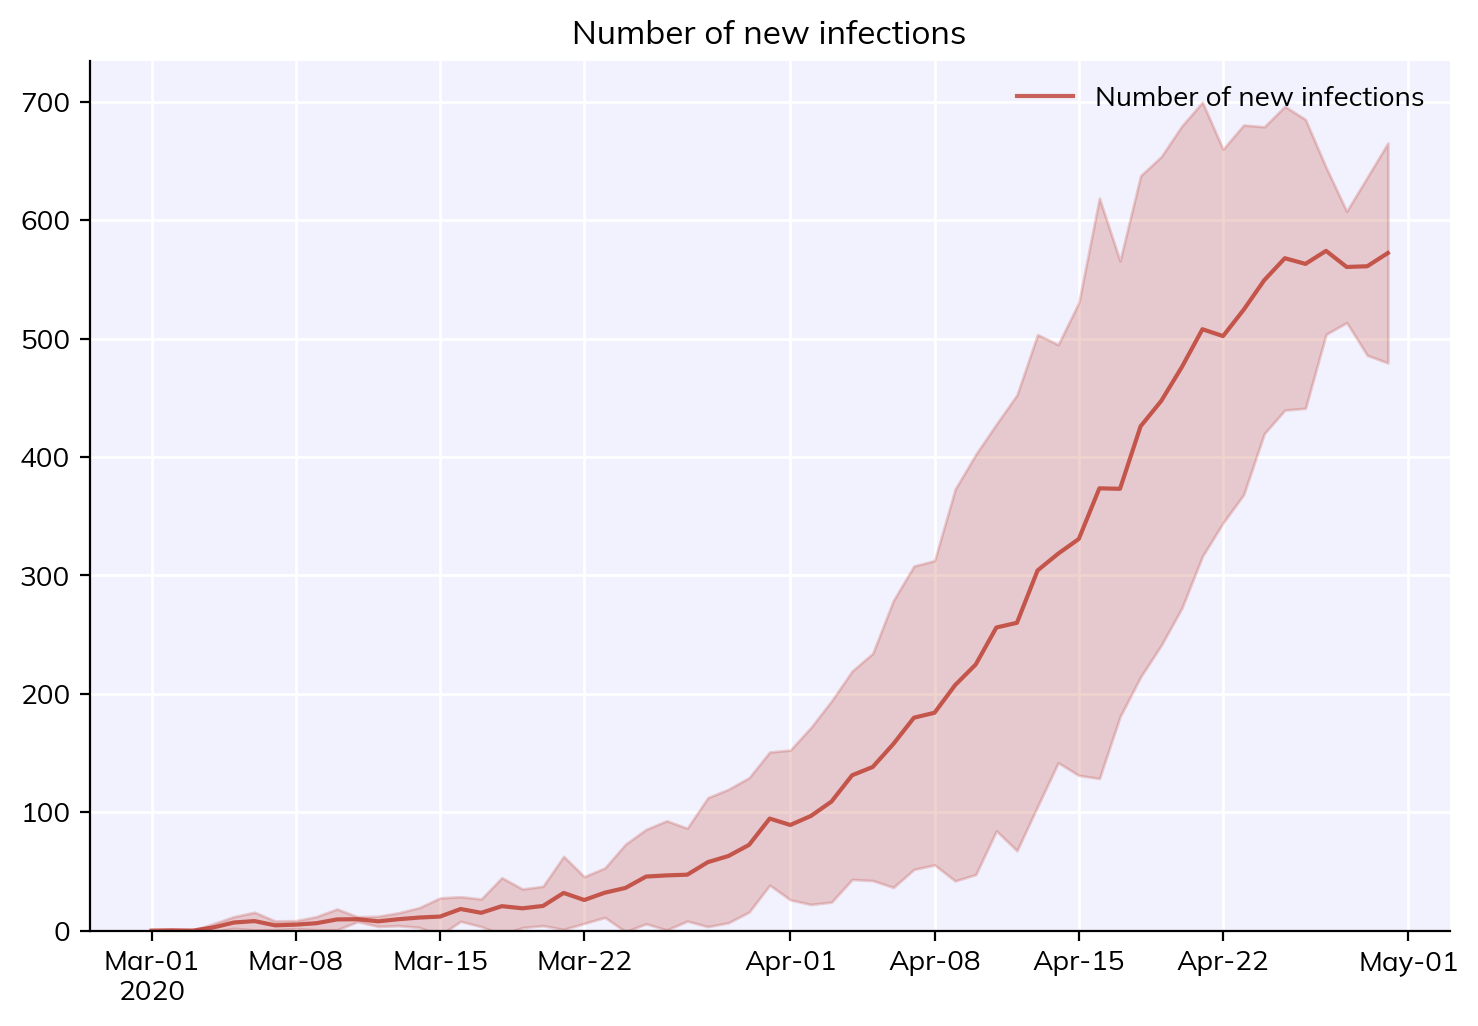

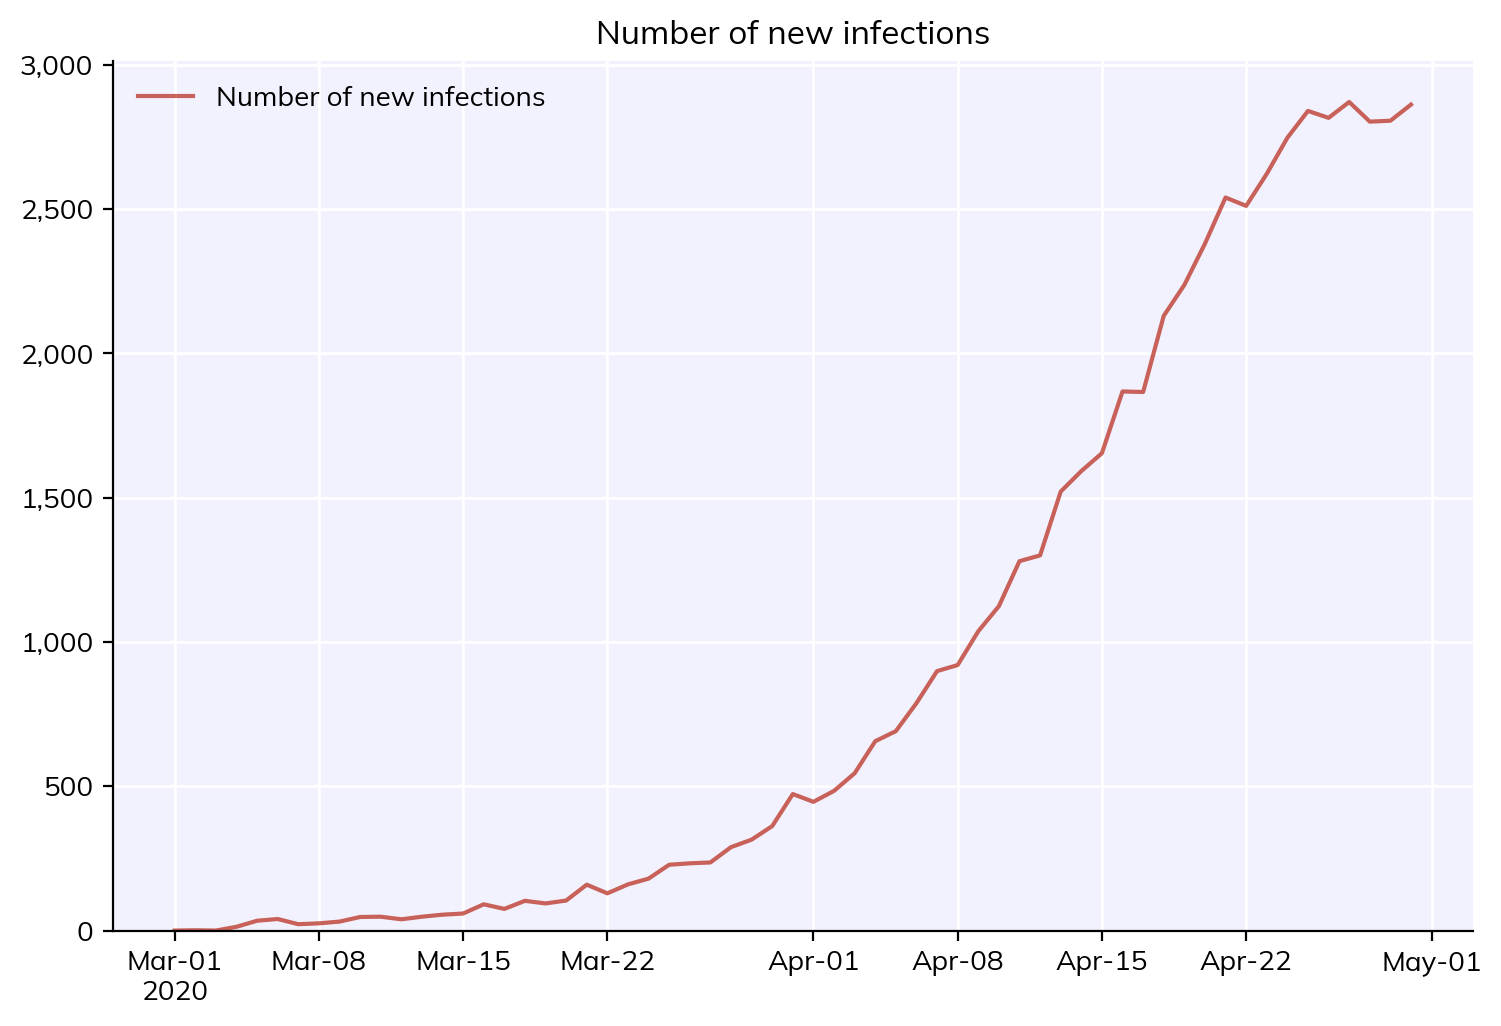

In [2]:
import covasim as cv
cv.options(jupyter=True, verbose=0)

sim = cv.Sim()
msim = cv.MultiSim(sim)
msim.run(n_runs=5)
msim.plot()


for sim in msim.sims:
    sim.brief()

msim.mean()
msim.plot_result('new_infections')

msim.combine()
msim.plot_result('new_infections') #Combined simulations

### Running different sims

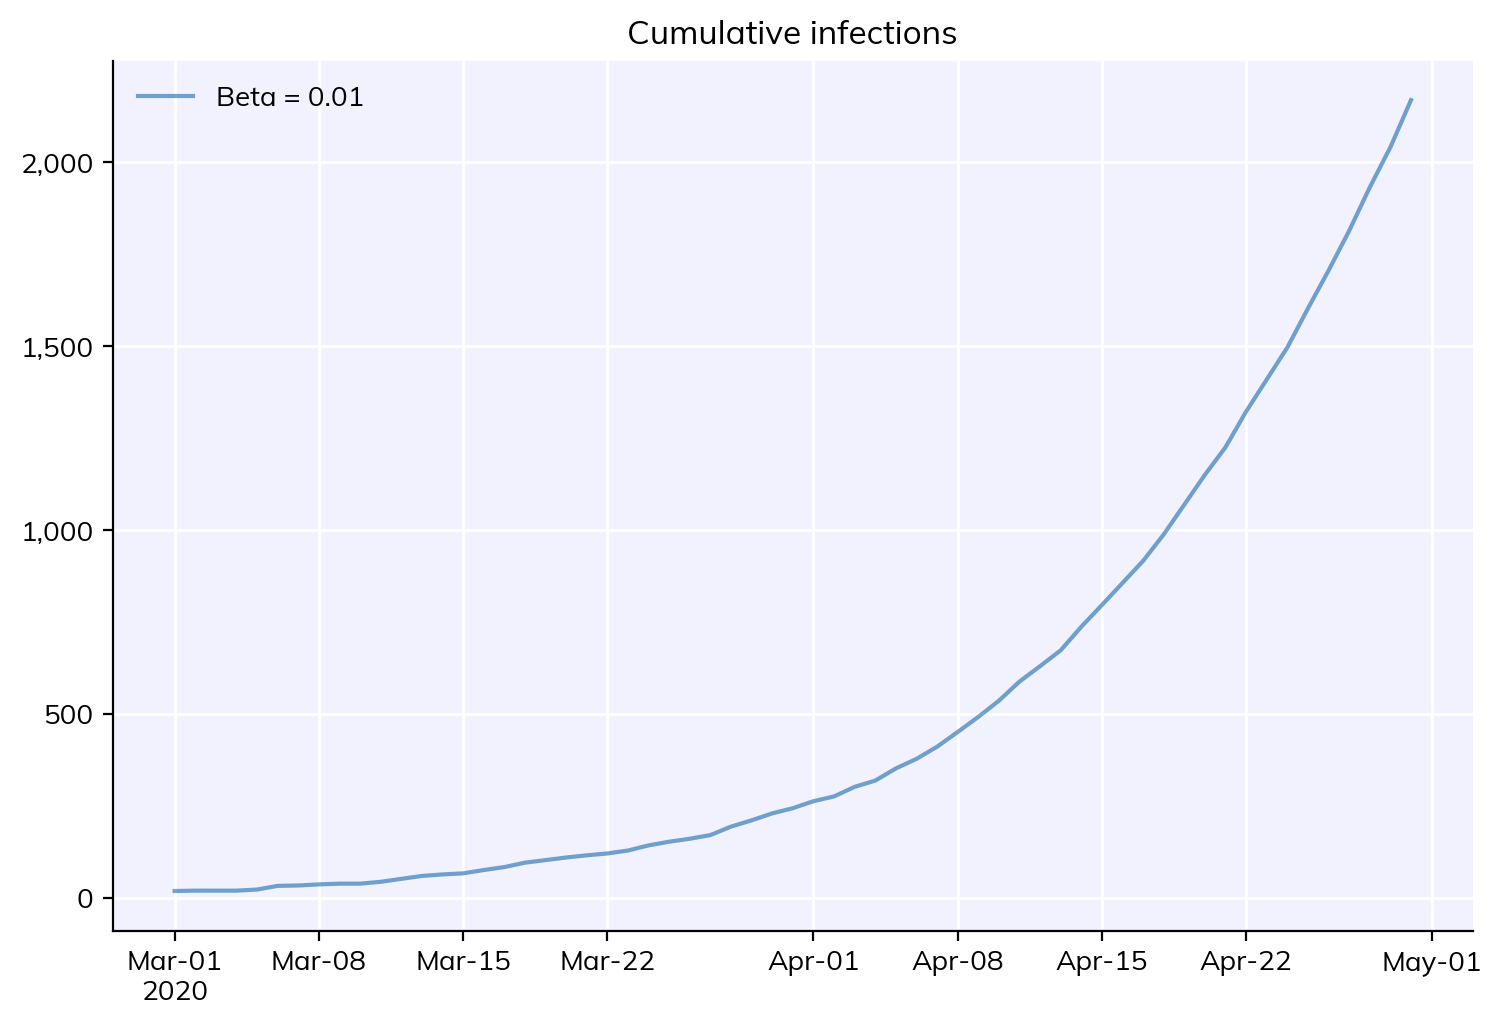

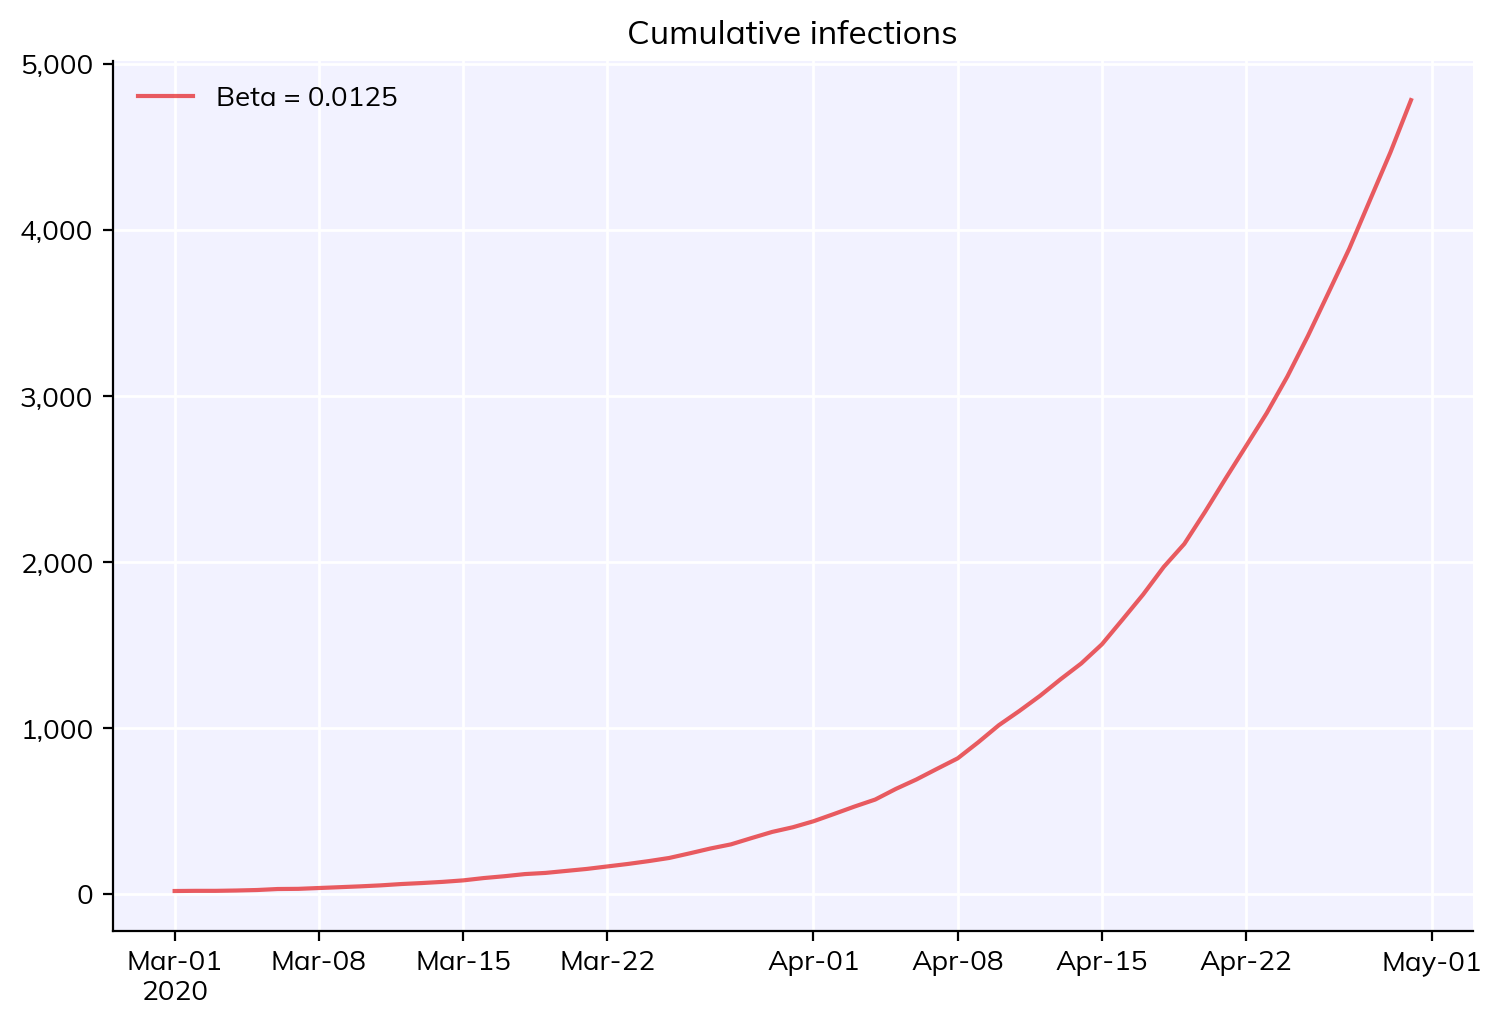

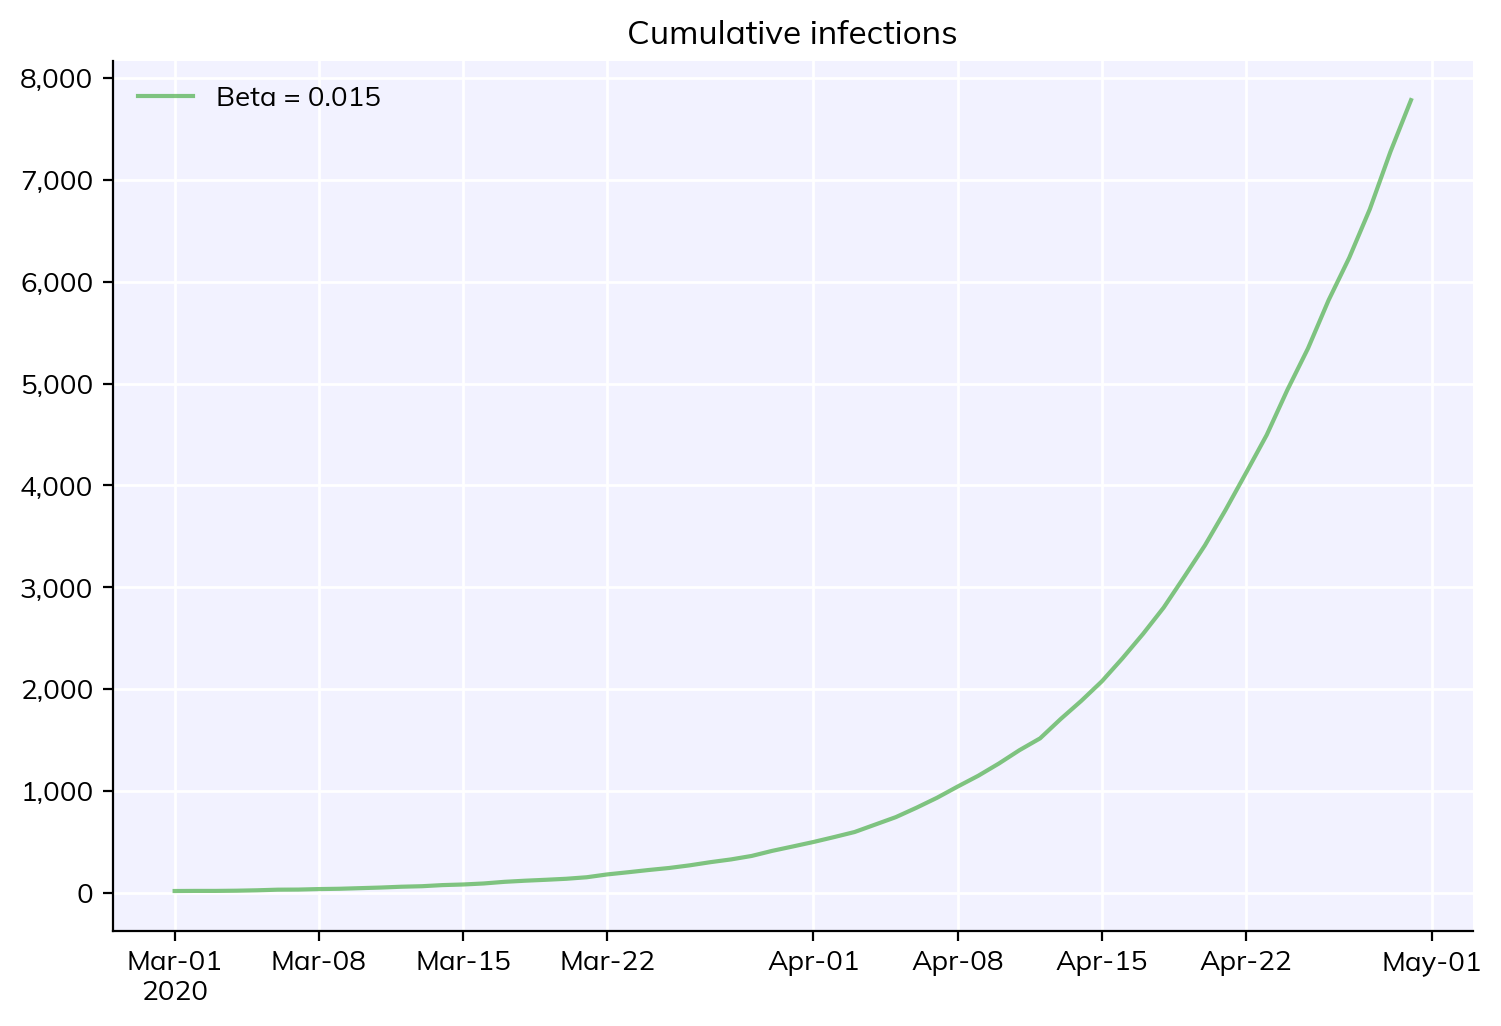

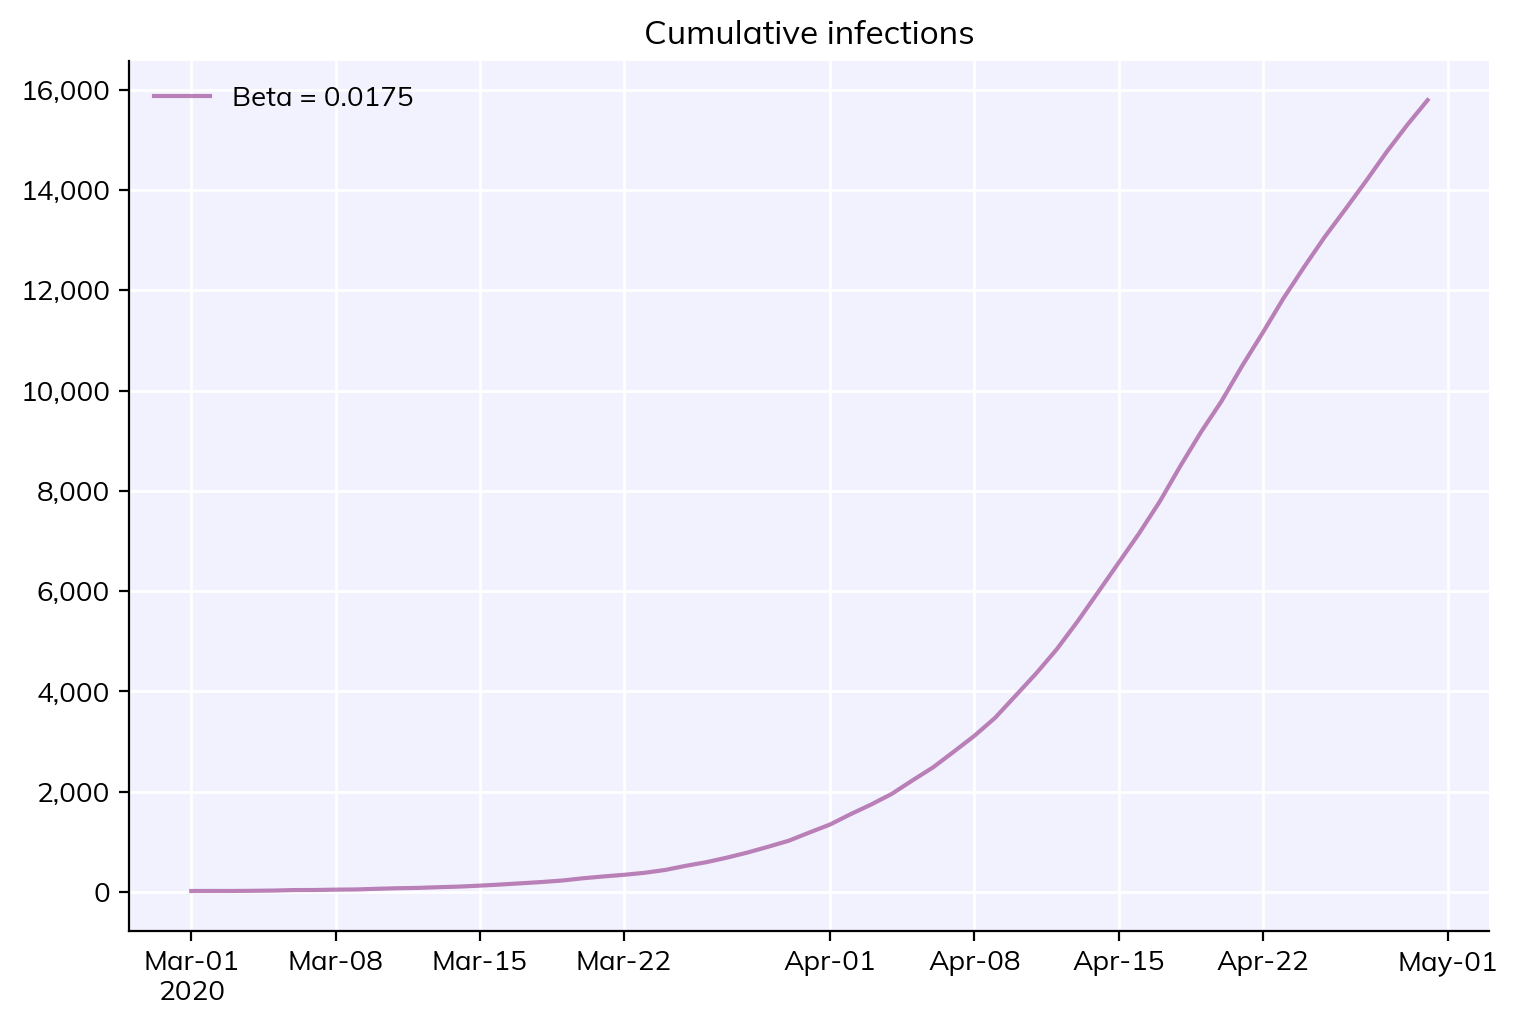

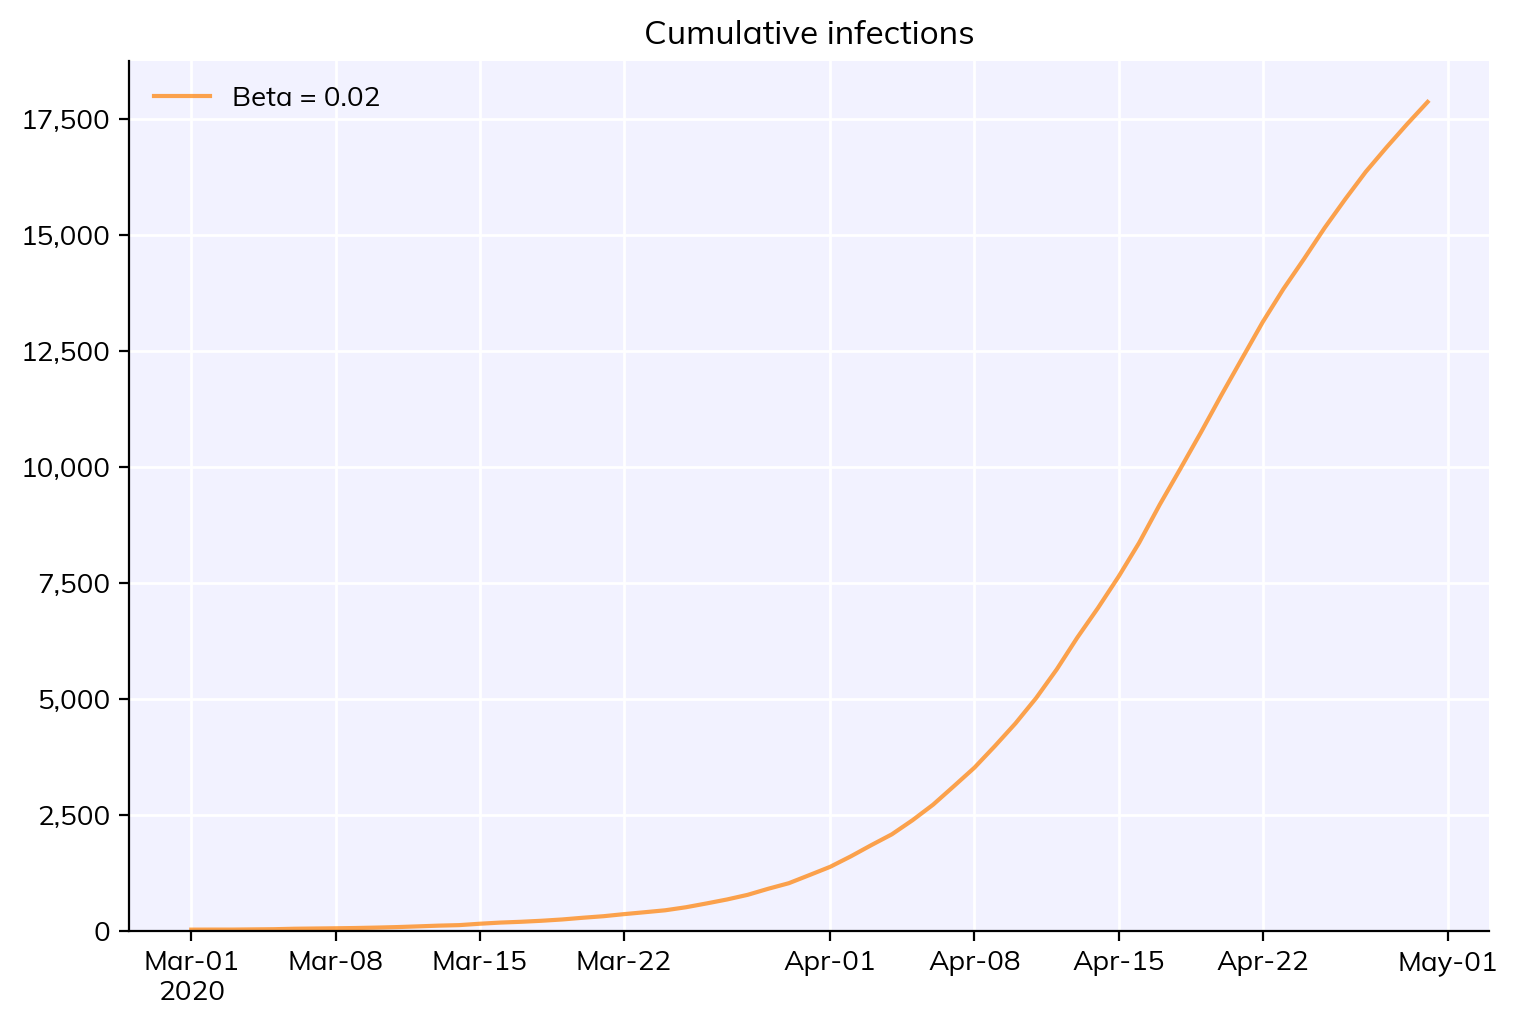

In [3]:
import numpy as np

betas = np.linspace(0.010, 0.020, 5) # Sweep beta from 0.01 to 0.02 with 5 values
sims = []
for beta in betas:
    sim = cv.Sim(beta=beta, label=f'Beta = {beta}')
    sims.append(sim)
msim = cv.MultiSim(sims)
msim.run()
msim.plot_result('cum_infections')

##### Always run with multisims as they give more flexibility. However, we are more interested in scenarios.




### Example scenario 

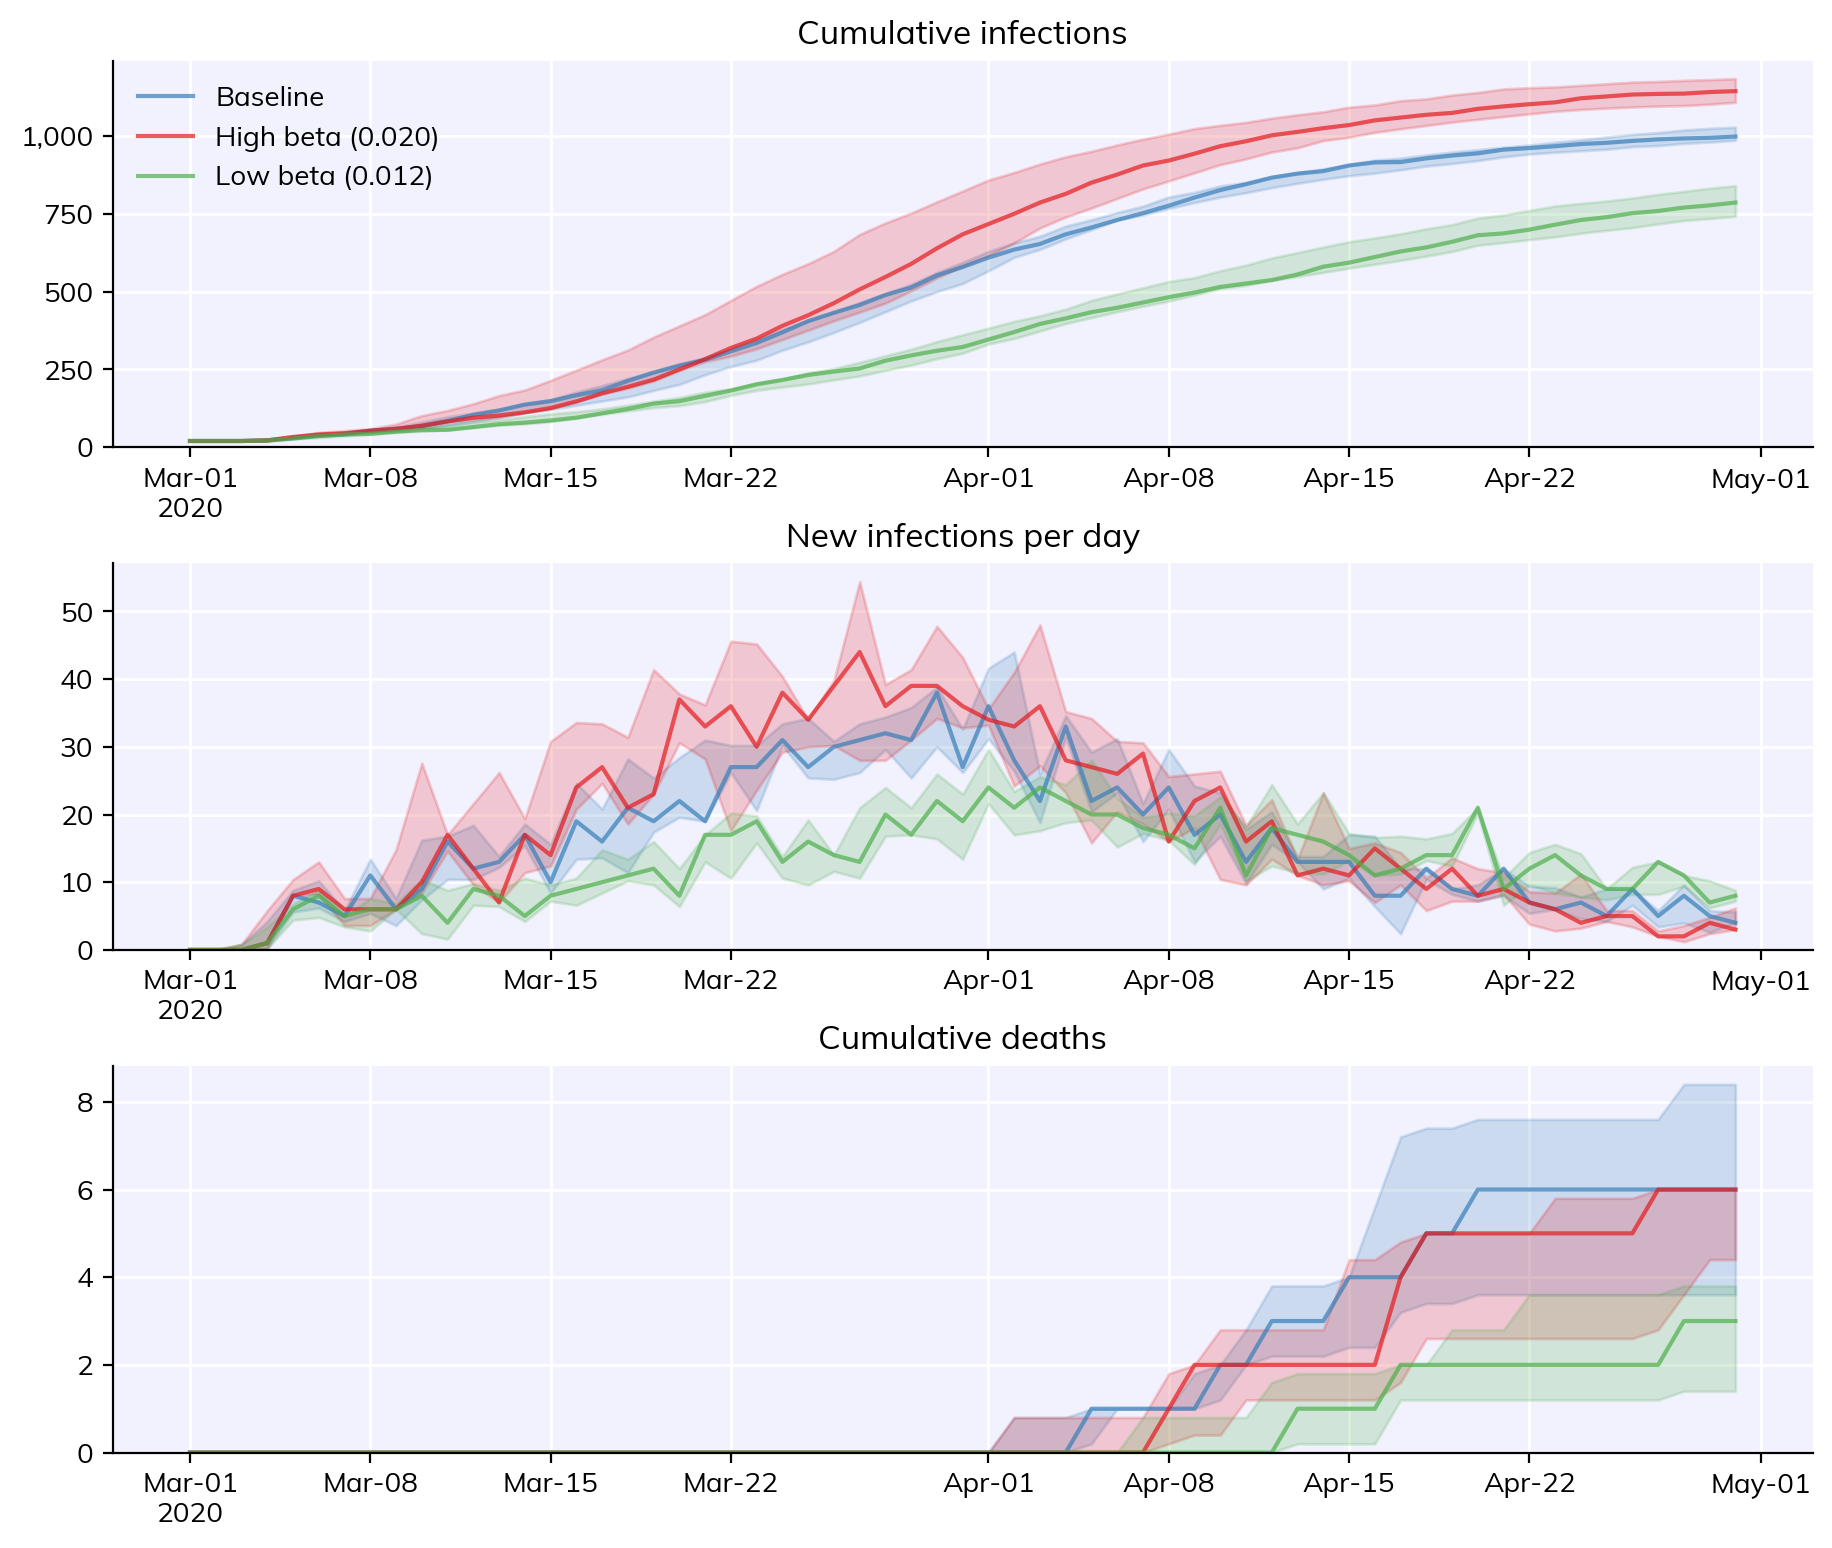

In [6]:
# Set base parameters -- these will be shared across all scenarios, play arround with this
basepars = {'pop_size':10e2} 

# Configure the settings for each scenario
scenarios = {'baseline': {
              'name':'Baseline',
              'pars': {}
              },
            'high_beta': {
              'name':'High beta (0.020)',
              'pars': {
                  'beta': 0.020,
                  }
              },
            'low_beta': {
              'name':'Low beta (0.012)',
              'pars': {
                  'beta': 0.012,
                  }
              },
             }

# Run and plot the scenarios
scens = cv.Scenarios(basepars=basepars, scenarios=scenarios)
scens.run()
scens.plot()

# Adding people and data;

3 minumum data requirements;
- **Population size:** To interpret results correctly, you need to know what the correct denominator is. Typically this is the city or country you're modeling, but sometimes it's not as simple as it may seem, especially early in an epidemic when cases tend to be concentrated near the source of the outbreak.
- **Deaths per day:** Often considered to be the most reliable source of data, since deaths tend to be under-reported less than infections; however, significant under-reporting can still occur, so always treat reported deaths as the *lower* limit of the true value.
- **Diagnosed cases per day:** Diagnosed cases are the most responsive measure of the epidemic conditions; however, they are dependent on both the number of infections and the testing rate. In settings with low or highly variable rates of testing, they may not be especially reliable.

In addition to these essential data requirements, several other pieces of data are useful to have. These are:
- **Seroprevalence:** Although seroprevalence rates wane over time, they are generally a more reliable indicator of total infections than diagnosed cases.
- **Tests per day:** The number of tests can be used directly in the `test_num` intervention (see Tutorial 5), and is very useful for interpreting diagnoses data.
- **Vaccinations per day:** In locations with high vaccination rates, understanding when the vaccines were rolled out (and with which vaccines) is important for estimating current immunity levels.
- **Policy interventions:** While changes in transmission can often be seen directly in the data on cases and deaths, at minimum it is a useful sanity check to see if these changes line up with changes in policy such as mobility restrictions or mask mandates.

Data scrappers : Covasim includes a script to automatically download time series data on diagnoses, deaths, and other epidemiological information from several major sources of COVID-19 data.

[Corona Data Scraper](https://coronadatascraper.com)
 
[European Centre for Disease Prevention and
Control](https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases)

[COVID Tracking Project](https://covidtracking.com).

In [8]:
#Covasim includes pre-downloaded data on country (and US state) age distributions and household size distributions.

cv.data.show_locations() #inbuilt location data on CovaSIM 

There are 280 age distributions and 176 household size distributions.

List of available locations (case insensitive):

{'age_distributions': ['Afghanistan',
                       'Albania',
                       'Algeria',
                       'Angola',
                       'Antigua and Barbuda',
                       'Argentina',
                       'Armenia',
                       'Aruba',
                       'Australia',
                       'Austria',
                       'Azerbaijan',
                       'Bahamas',
                       'Bahrain',
                       'Bangladesh',
                       'Barbados',
                       'Belarus',
                       'Belgium',
                       'Belize',
                       'Benin',
                       'Bhutan',
                       'Bolivia',
                       'Bolivia (Plurinational State of)',
                       'Bosnia and Herzegovina',
                       'Botswana',
   

In [5]:
import pandas as pd
df = pd.read_csv('example_data.csv')
print(df)

          date  new_diagnoses  new_tests  deaths
0   2020-03-01              1         24       0
1   2020-03-02              3         22       0
2   2020-03-03              2         15       0
3   2020-03-04              8         40       0
4   2020-03-05             20         38       0
5   2020-03-06              9         61       0
6   2020-03-07              6         43       0
7   2020-03-08             13         98       0
8   2020-03-09              6         93       0
9   2020-03-10             25        170       0
10  2020-03-11             28        368       0
11  2020-03-12             27        437       0
12  2020-03-13             22        291       2
13  2020-03-14             43        328       0
14  2020-03-15             76       1147       0
15  2020-03-16             65       1438       1
16  2020-03-17             88       1209       0
17  2020-03-18             86       1269       0
18  2020-03-19            115       1195       1
19  2020-03-20      

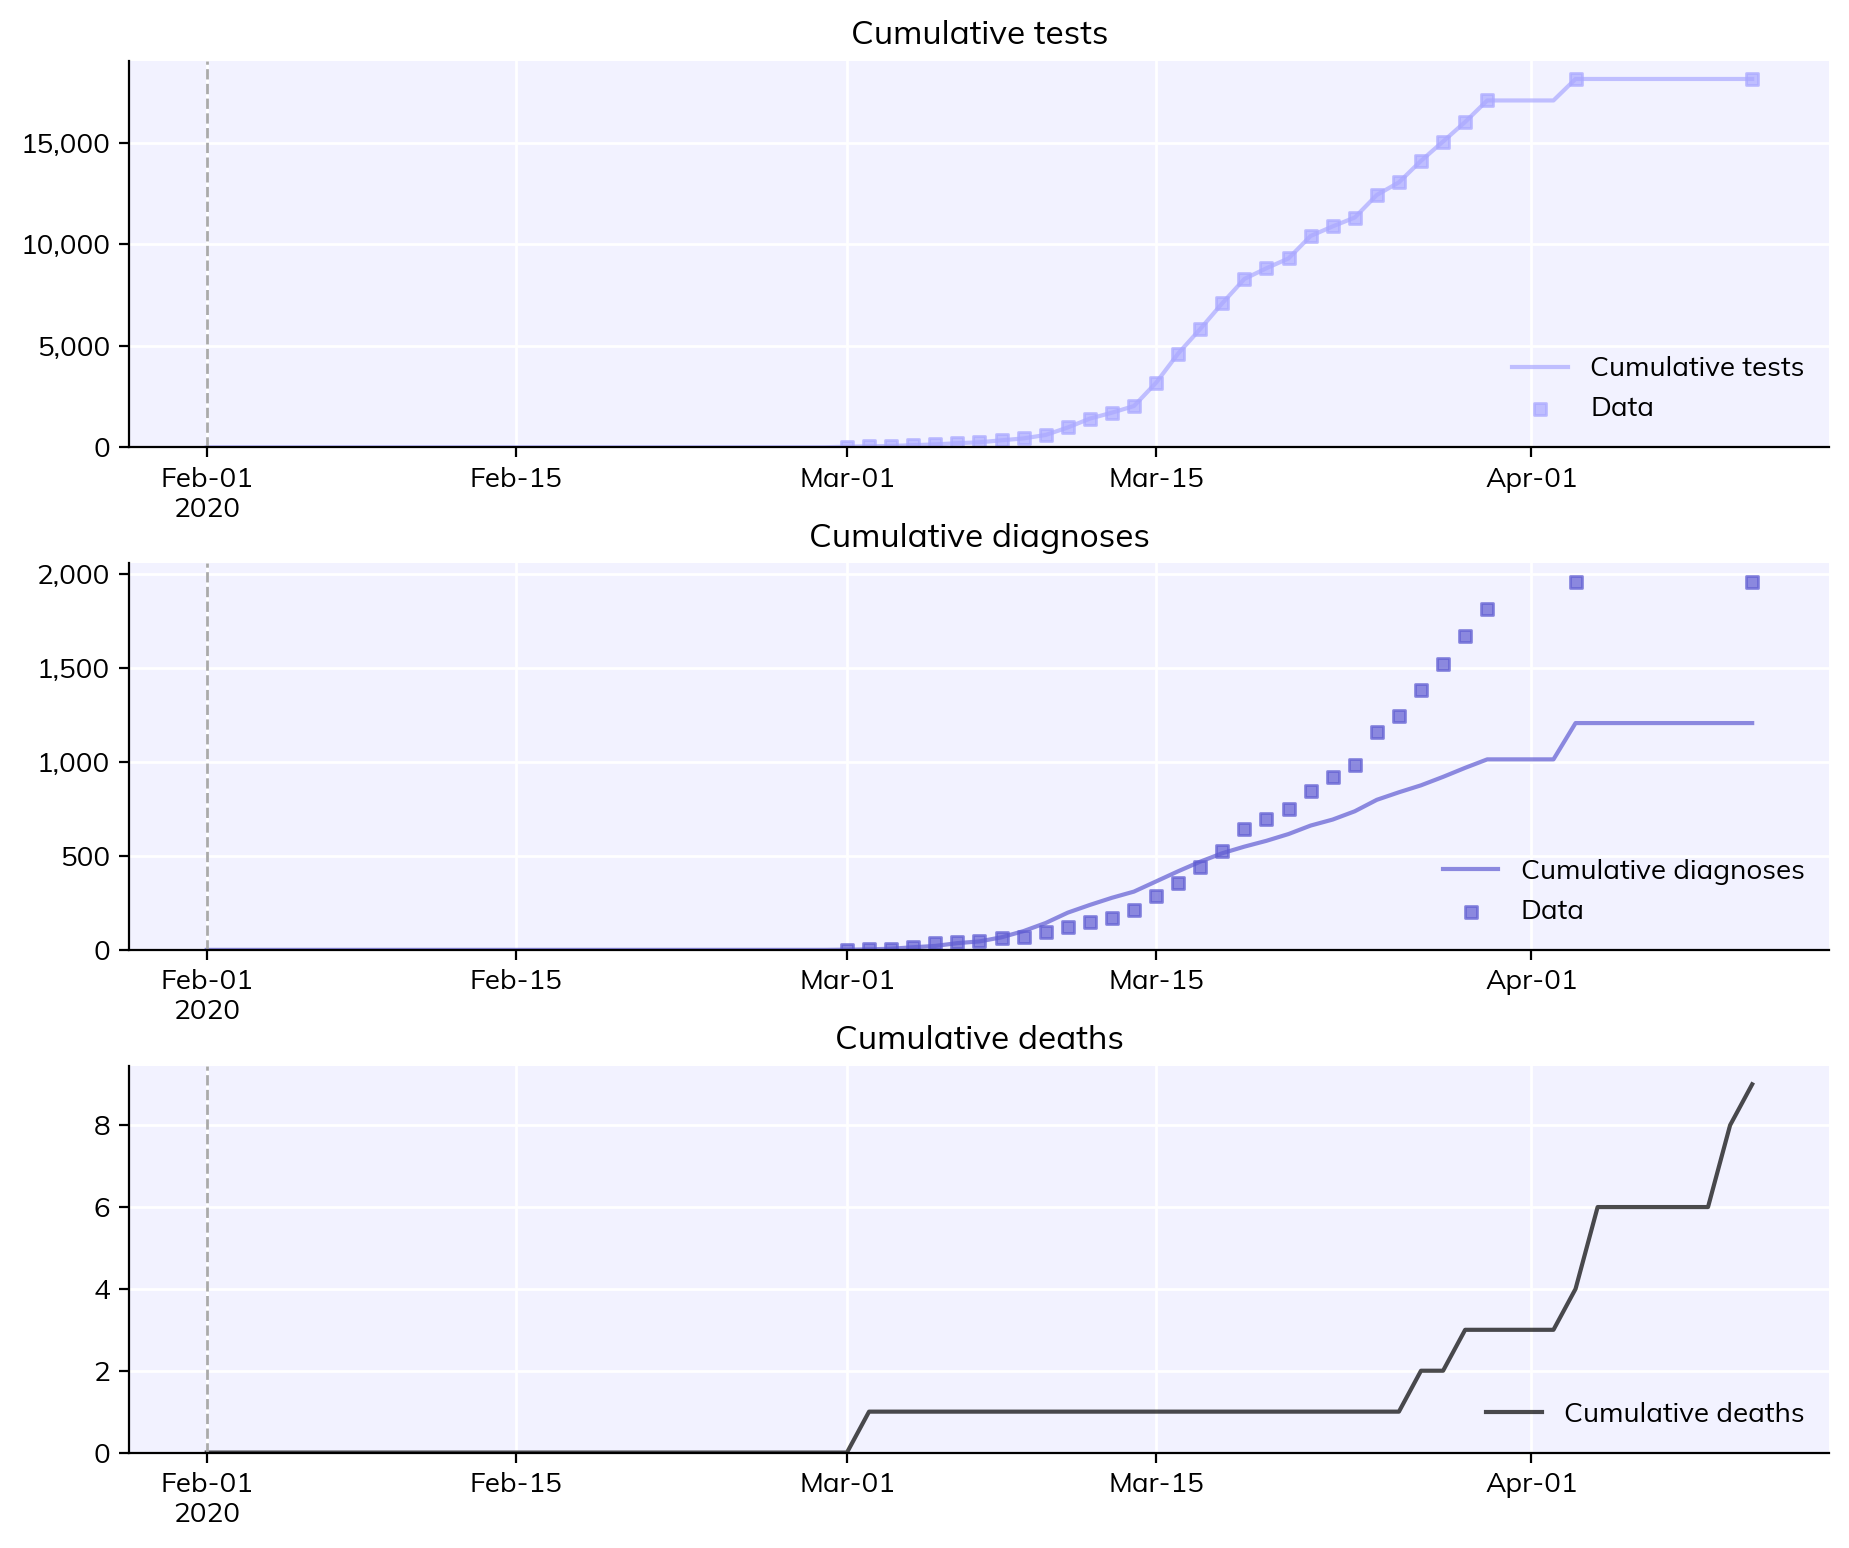

In [19]:
#Example run, with interventions:
    
import covasim as cv
cv.options(jupyter=True, verbose=0)

pars = dict(
    start_day = '2020-02-01',
    end_day   = '2020-04-11',
    beta      = 0.015,
)
sim = cv.Sim(pars=pars, datafile='example_data.csv', interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(['cum_tests', 'cum_diagnoses', 'cum_deaths'])

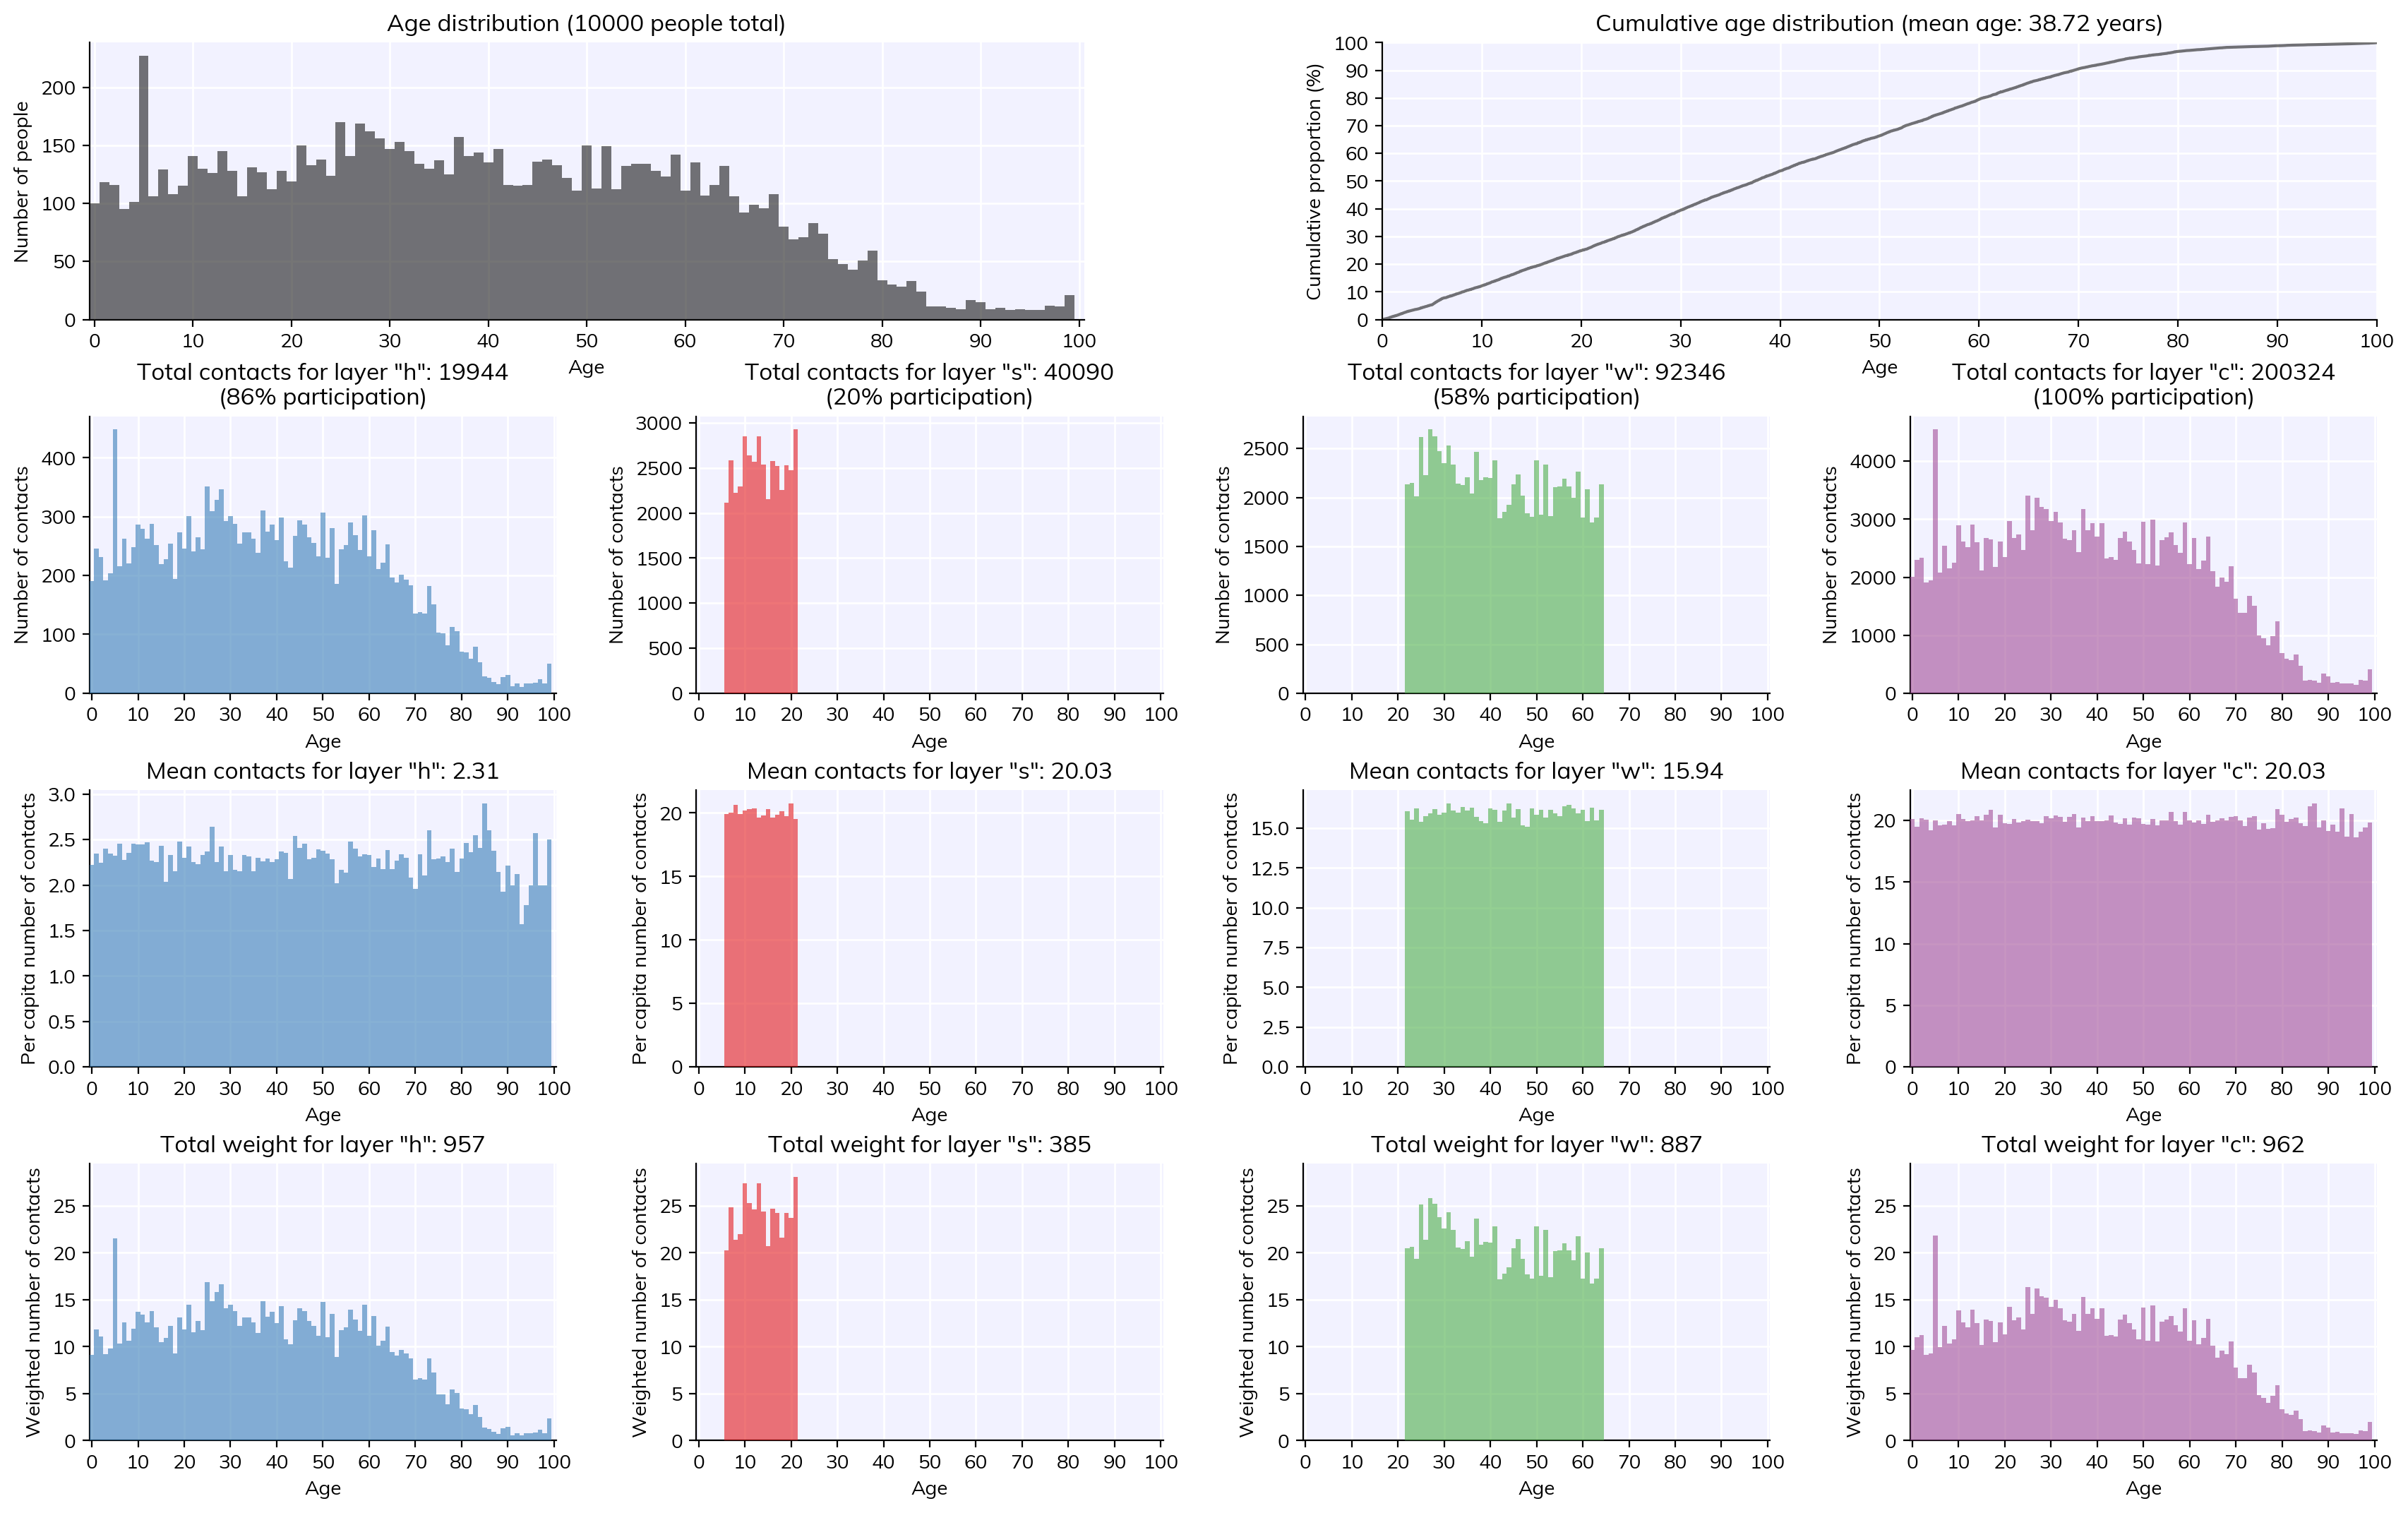

In [18]:
# Loading population data for california with in-built data

pars = dict(
    pop_size = 10_000, # Alternate way of writing 10000
    pop_type = 'hybrid',
    location = 'USA-California', # Case insensitive
)

sim = cv.Sim(pars)
sim.initialize() # Create people
fig = sim.people.plot() # Show statistics of the people





In [ ]:
#Example run, with interventions using inbuilt california data:
    
import covasim as cv
cv.options(jupyter=True, verbose=0)

pars = dict(
    start_day = '2021-01-01',
    end_day   = '2021-03-01',
    beta      = 0.015,
    location = 'USA-California'
)
sim = cv.Sim(pars=pars, datafile='example_data.csv', interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(['cum_tests', 'cum_diagnoses', 'cum_deaths'])

# Simulations using Real California data

In [6]:
cal_df = pd.read_csv('california_data/covid_CA_daily_updated.csv') # California data sent by Shakwat

print(cal_df)

          date  population  hospitalized_confirmed  hospitalized_suspected  \
0     1/1/2021    40129160                   20344                     859   
1     1/2/2021    40129160                   20690                     820   
2     1/3/2021    40129160                   21128                     875   
3     1/4/2021    40129160                   21597                     888   
4     1/5/2021    40129160                   21923                     898   
..         ...         ...                     ...                     ...   
785  2/25/2023    40129160                    2483                     501   
786  2/26/2023    40129160                    2548                     464   
787  2/27/2023    40129160                    2530                     469   
788  2/28/2023    40129160                    2517                     458   
789   3/1/2023    40129160                    2506                     461   

     hospitalized_covid_patients  cases_new  cumulative_cases_n

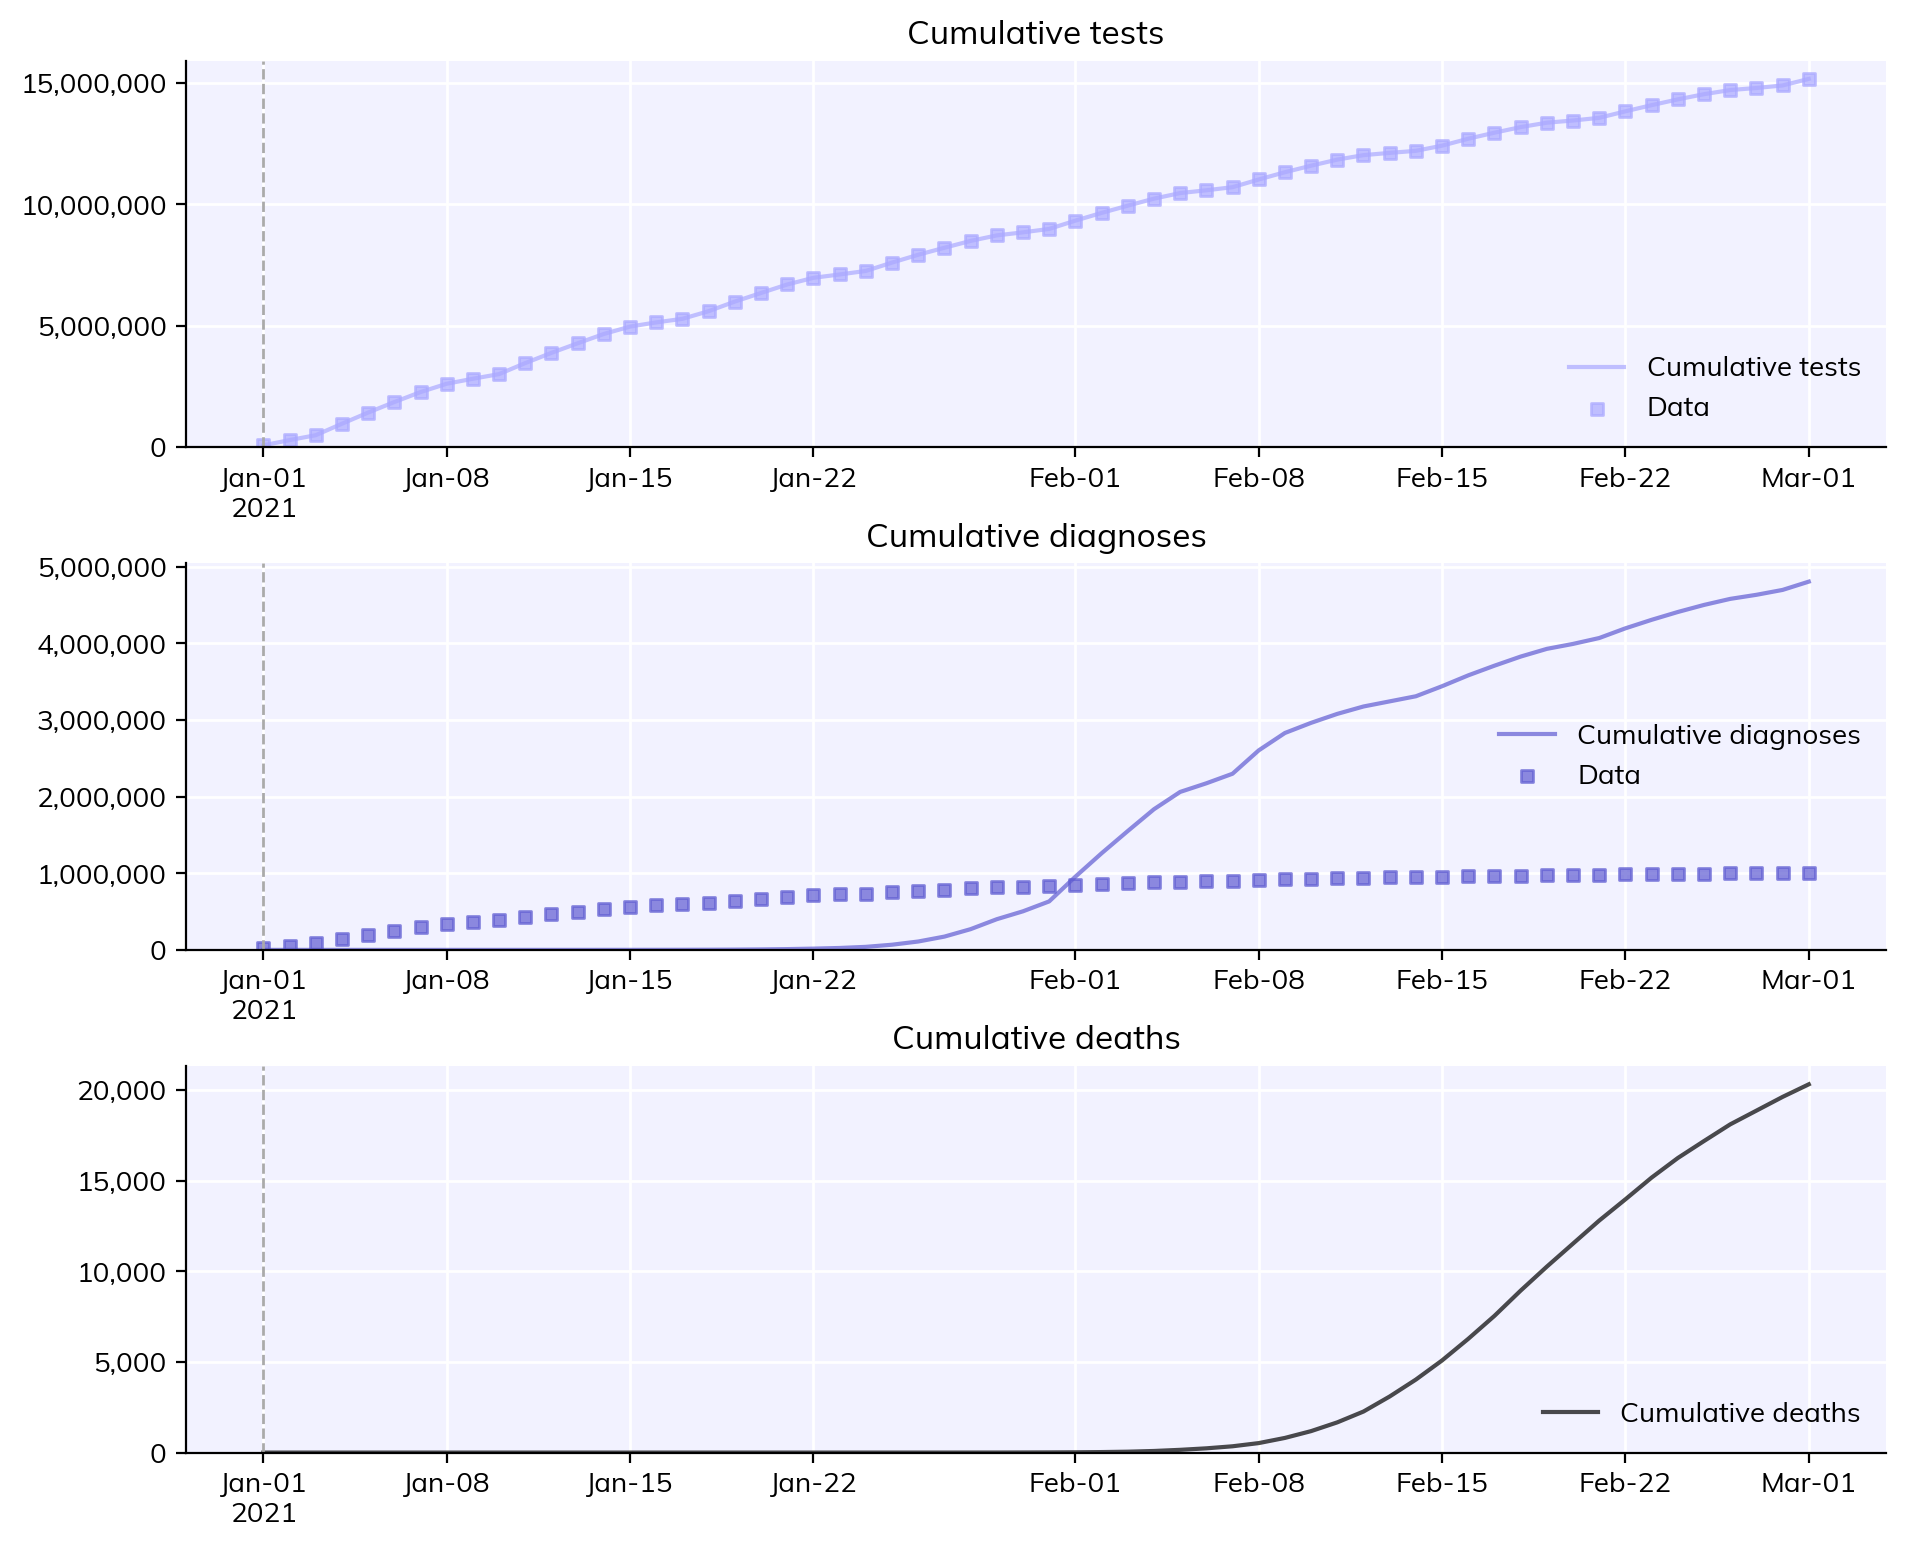

In [4]:
#Example run, with interventions using real california data:
    
import covasim as cv
cv.options(jupyter=True, verbose=0)

pars = dict(
    start_day = '2021-01-01',
    end_day   = '2021-03-01',
    beta      = 0.3,
    pop_size = 4000000,  # California population is 40 million
    pop_type  = 'hybrid'
)
sim = cv.Sim(pars=pars, datafile='california_data/covid_CA_jan_feb.csv', interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(['cum_tests', 'cum_diagnoses', 'cum_deaths'])

Simulation and real data points are not a good fit. It needs to be calibrated.

### Simulation on Alameda county- California

In [13]:
import pandas as pd
df_alameda = pd.read_csv('california_data/covid_county_ca.csv')
#print(df_alameda)

In [14]:
df_alameda = df_alameda.loc[df_alameda['county'] == 'Alameda'] # Scrapping only Alameda county data
df_alameda = df_alameda.rename(columns={'total_tests': 'new_tests', 'positive_tests': 'new_diagnoses'})
df_alameda.to_csv('california_data/covid_county_alameda.csv')    #Save to csv

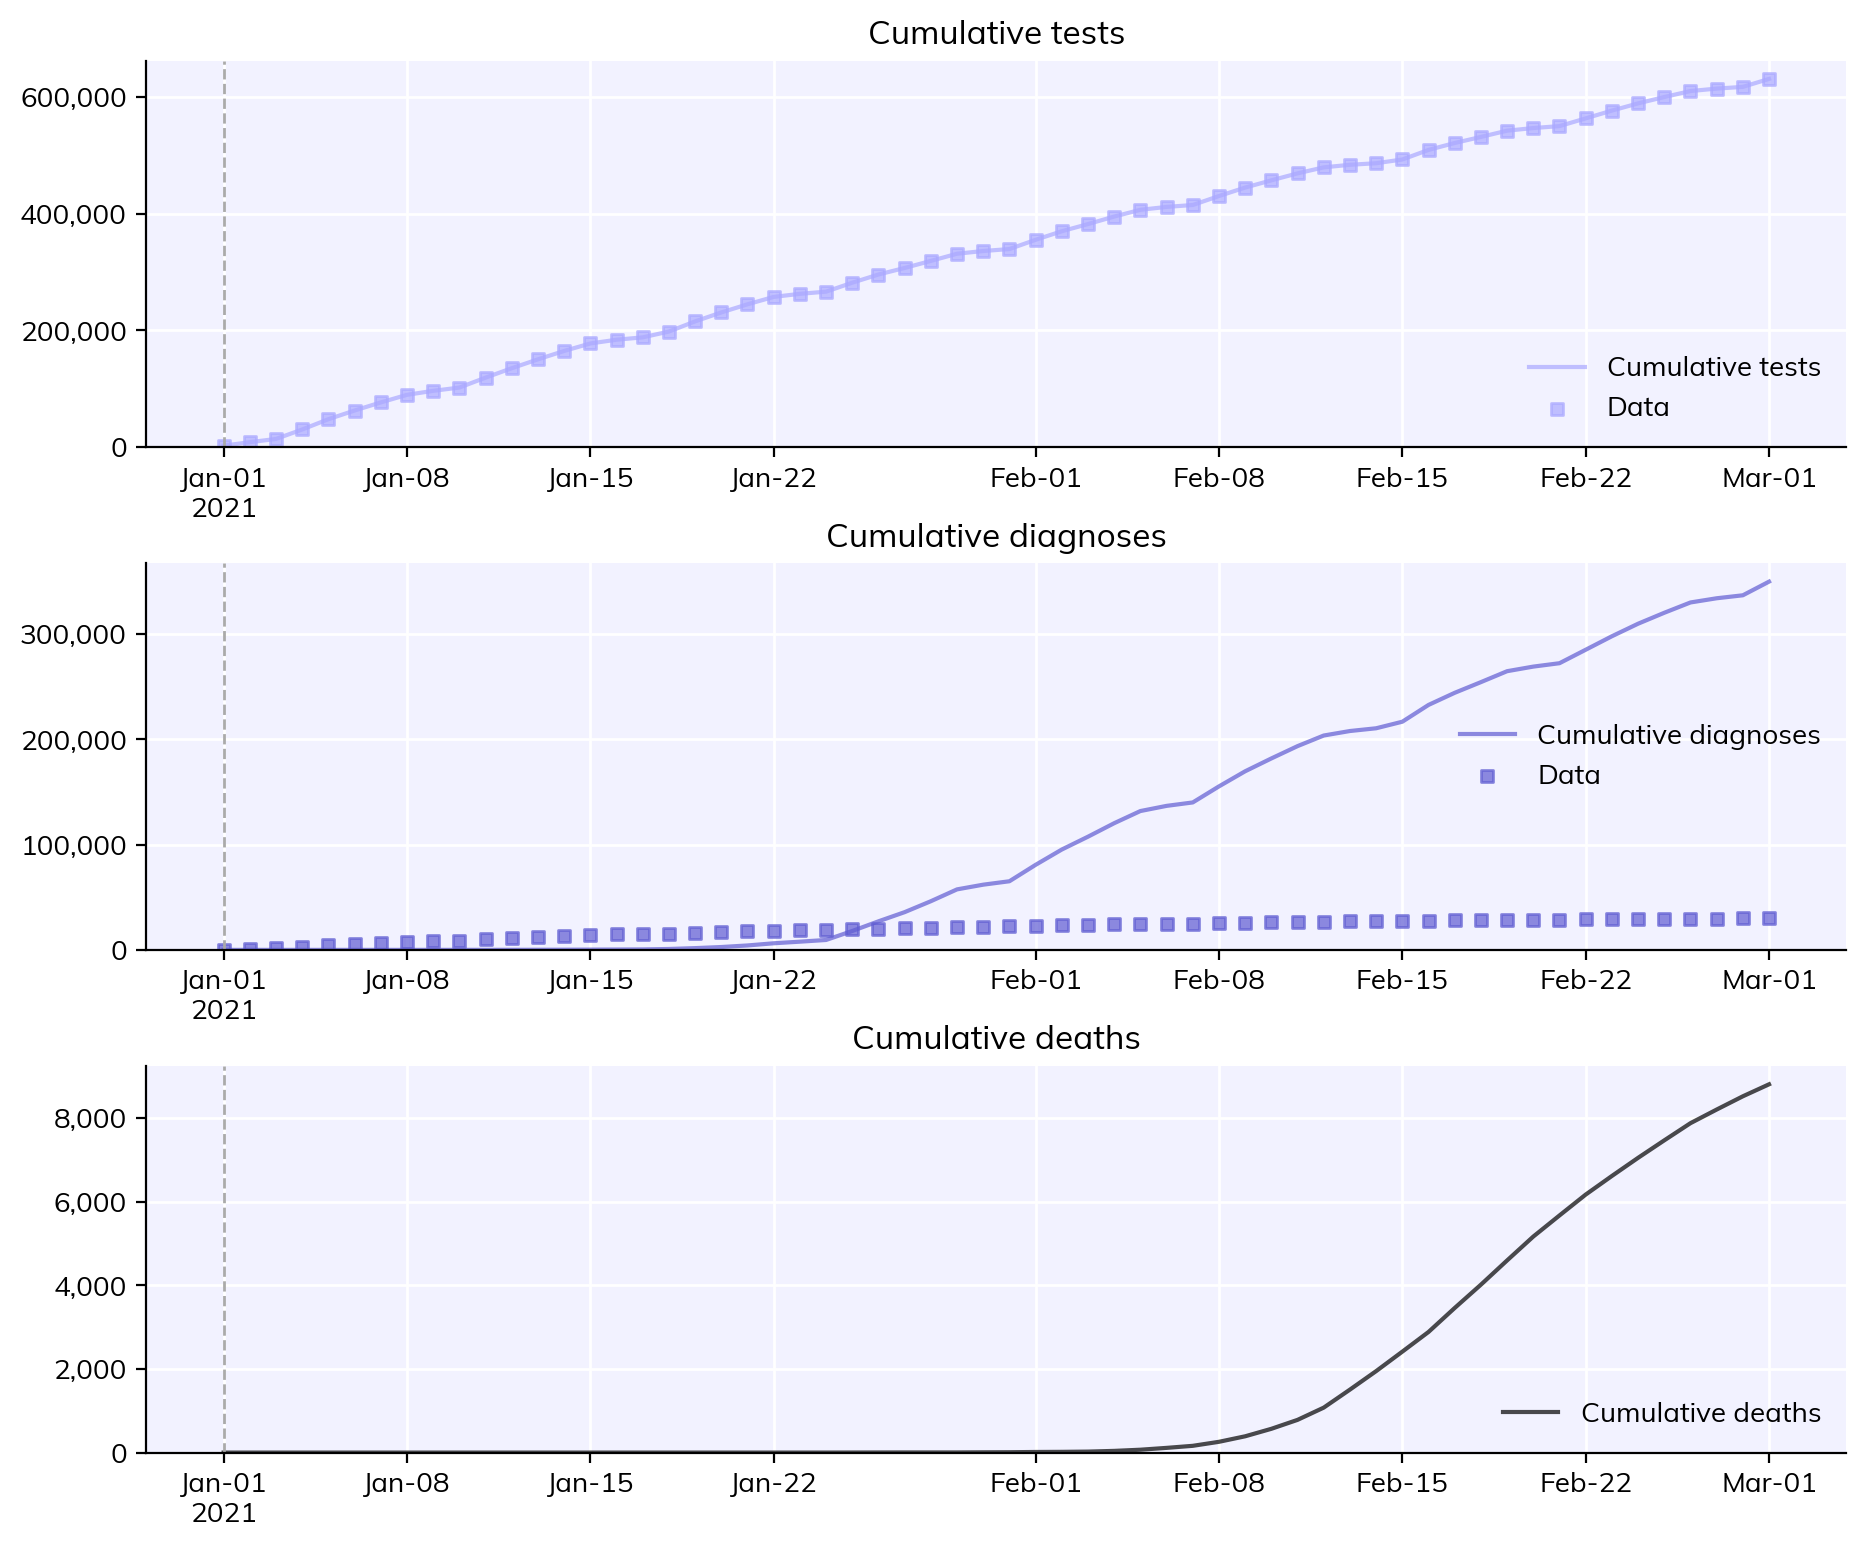

In [33]:
#Example run, with testing intervention using real california Alameda county data data:
    
import covasim as cv
cv.options(jupyter=True, verbose=0)

pars = dict(
    start_day = '2021-01-01',
    end_day   = '2021-03-01',
    beta      = 0.2,
    pop_size  = 1685886, # California-Alameda population is 1685886
    pop_type  = 'hybrid'
)
sim = cv.Sim(pars=pars, datafile='california_data/covid_county_alameda.csv', interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(['cum_tests', 'cum_diagnoses', 'cum_deaths'])

**Running multiple sims on california data (Check again, something seems to be wrong)**

In [35]:
plot_dict = {
    'Overview California data JAN-FEB': ['cum_infections'],
    'Cumulative Health Outcomes California data JAN-FEB': ['cum_severe', 'cum_critical', 'cum_deaths']}

plot_list = ['cum_infections', 'cum_severe', 'cum_critical', 'cum_deaths']

analysis_states = ['severe', 'critical', 'dead']

In [33]:
def create_sims(sim_pars, data, label, seeds=None, num_runs=None):
    sims = []

    if seeds is None:
        seeds = range(num_runs)

    for i in range(min(num_runs if num_runs else 0, len(seeds))):
        sim_pars['rand_seed'] = seeds[i]
        sim = cv.Sim(pars=sim_pars, datafile= data, label=label)
        sims.append(sim)

    return sims


#pars=pars, datafile='california_data/covid_CA_jan_feb.csv', interventions=cv.test_num(daily_tests='data')

data='california_data/covid_CA_jan_feb.csv'

standard_msim = cv.MultiSim(create_sims(pars, data, 'Covasim Standard Copy', num_runs=10))
standard_msim.run(keep_people=True)


MultiSim("Covasim Standard Copy"; n_sims: 10; base: Sim("Covasim Standard Copy"; 2021-01-01 to 2021-03-01; pop: 20000 random; epi: not run))

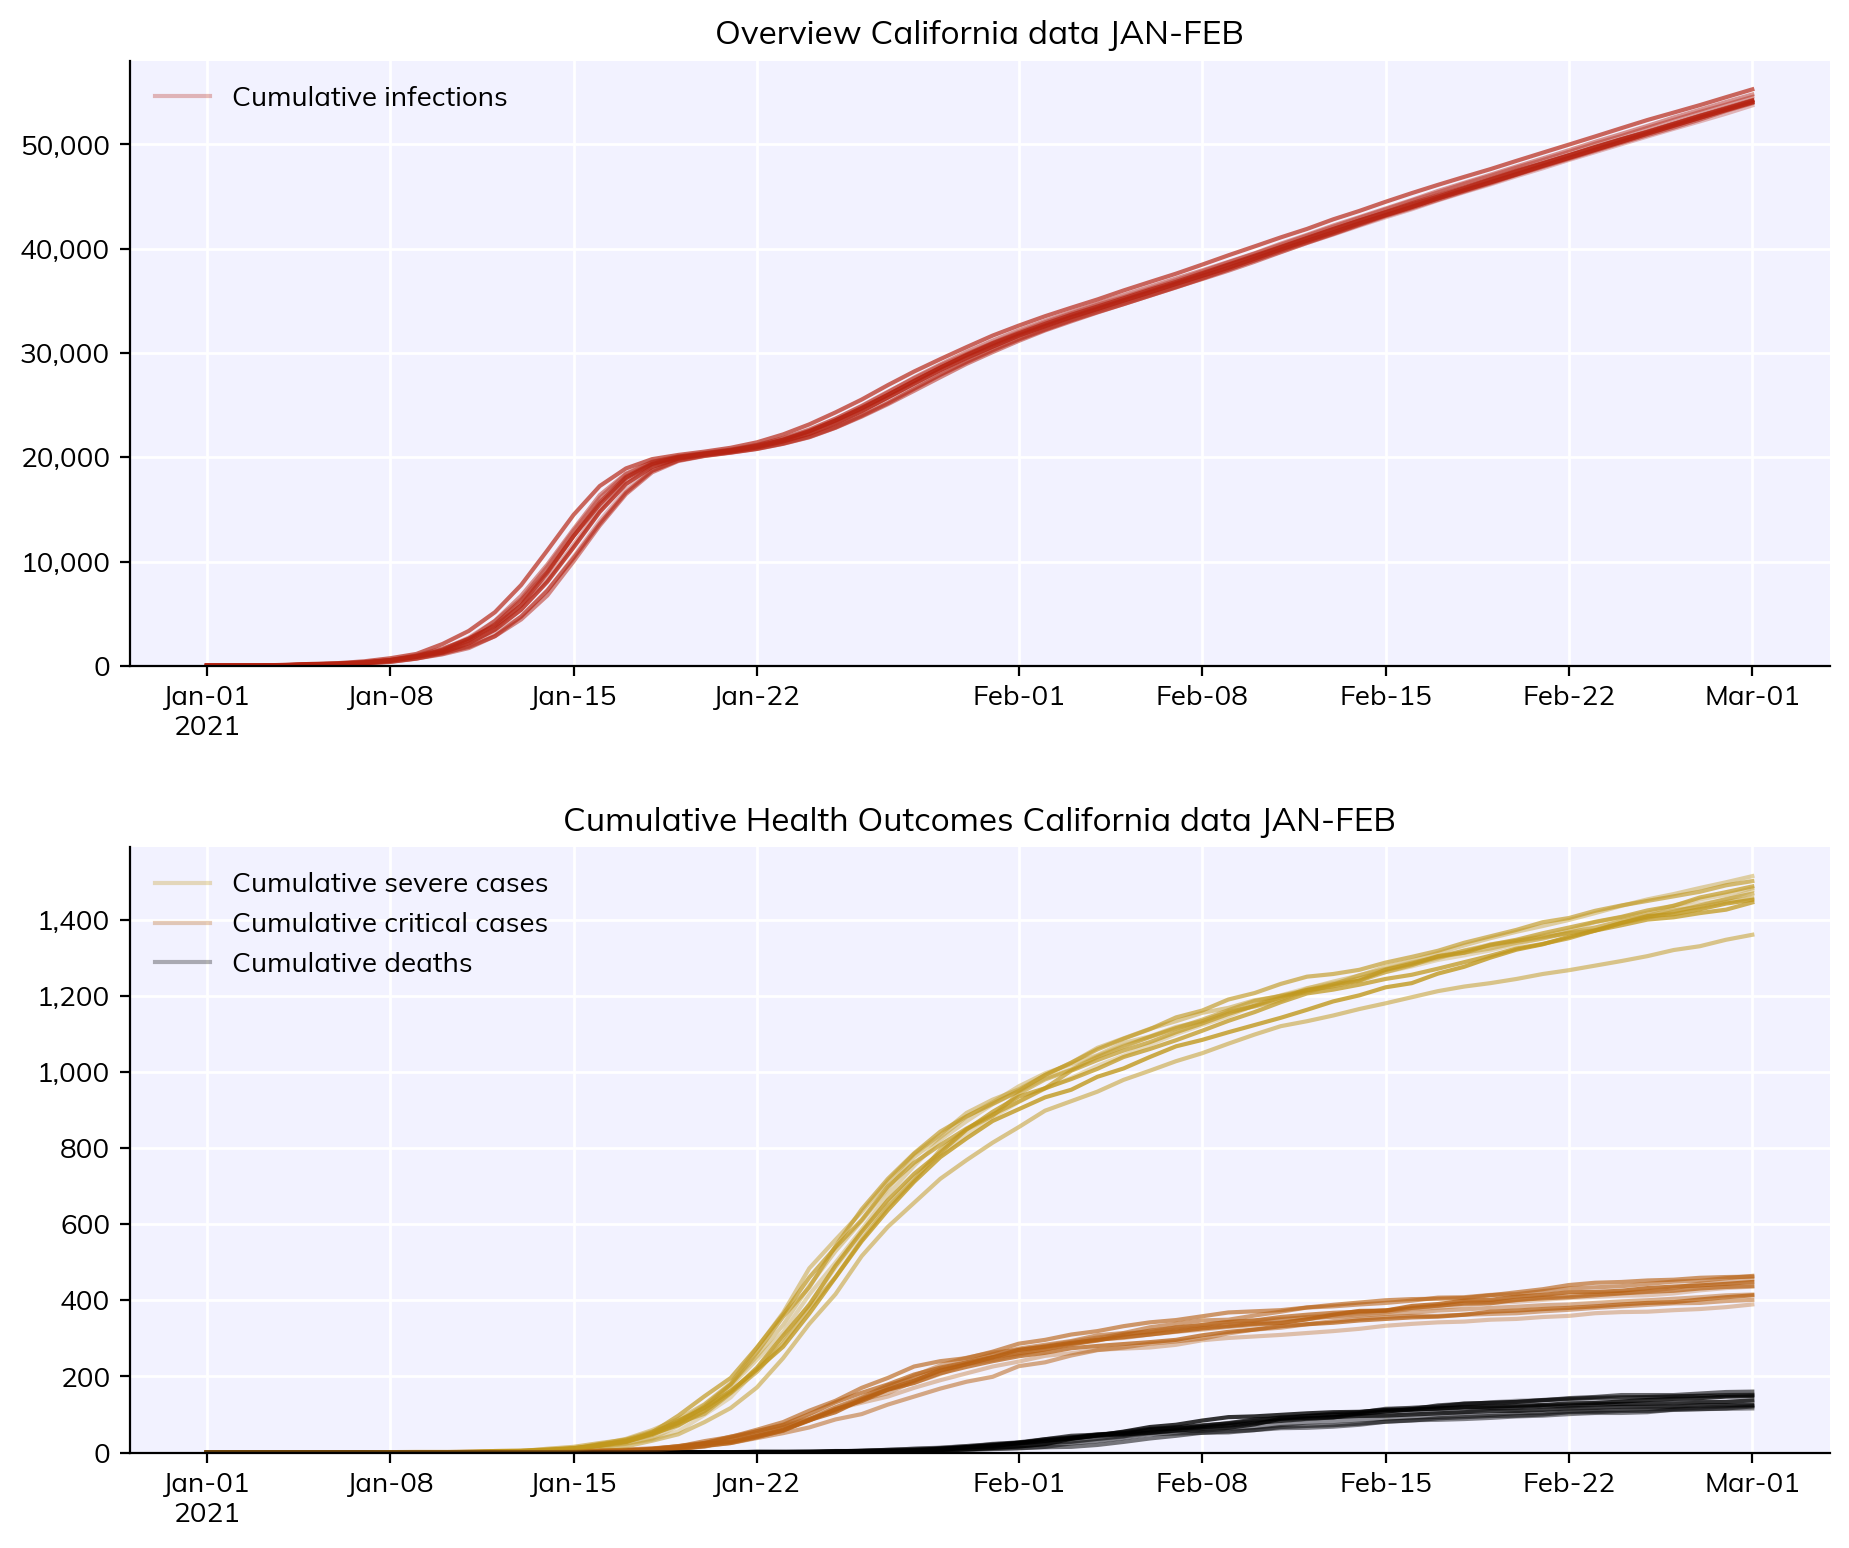

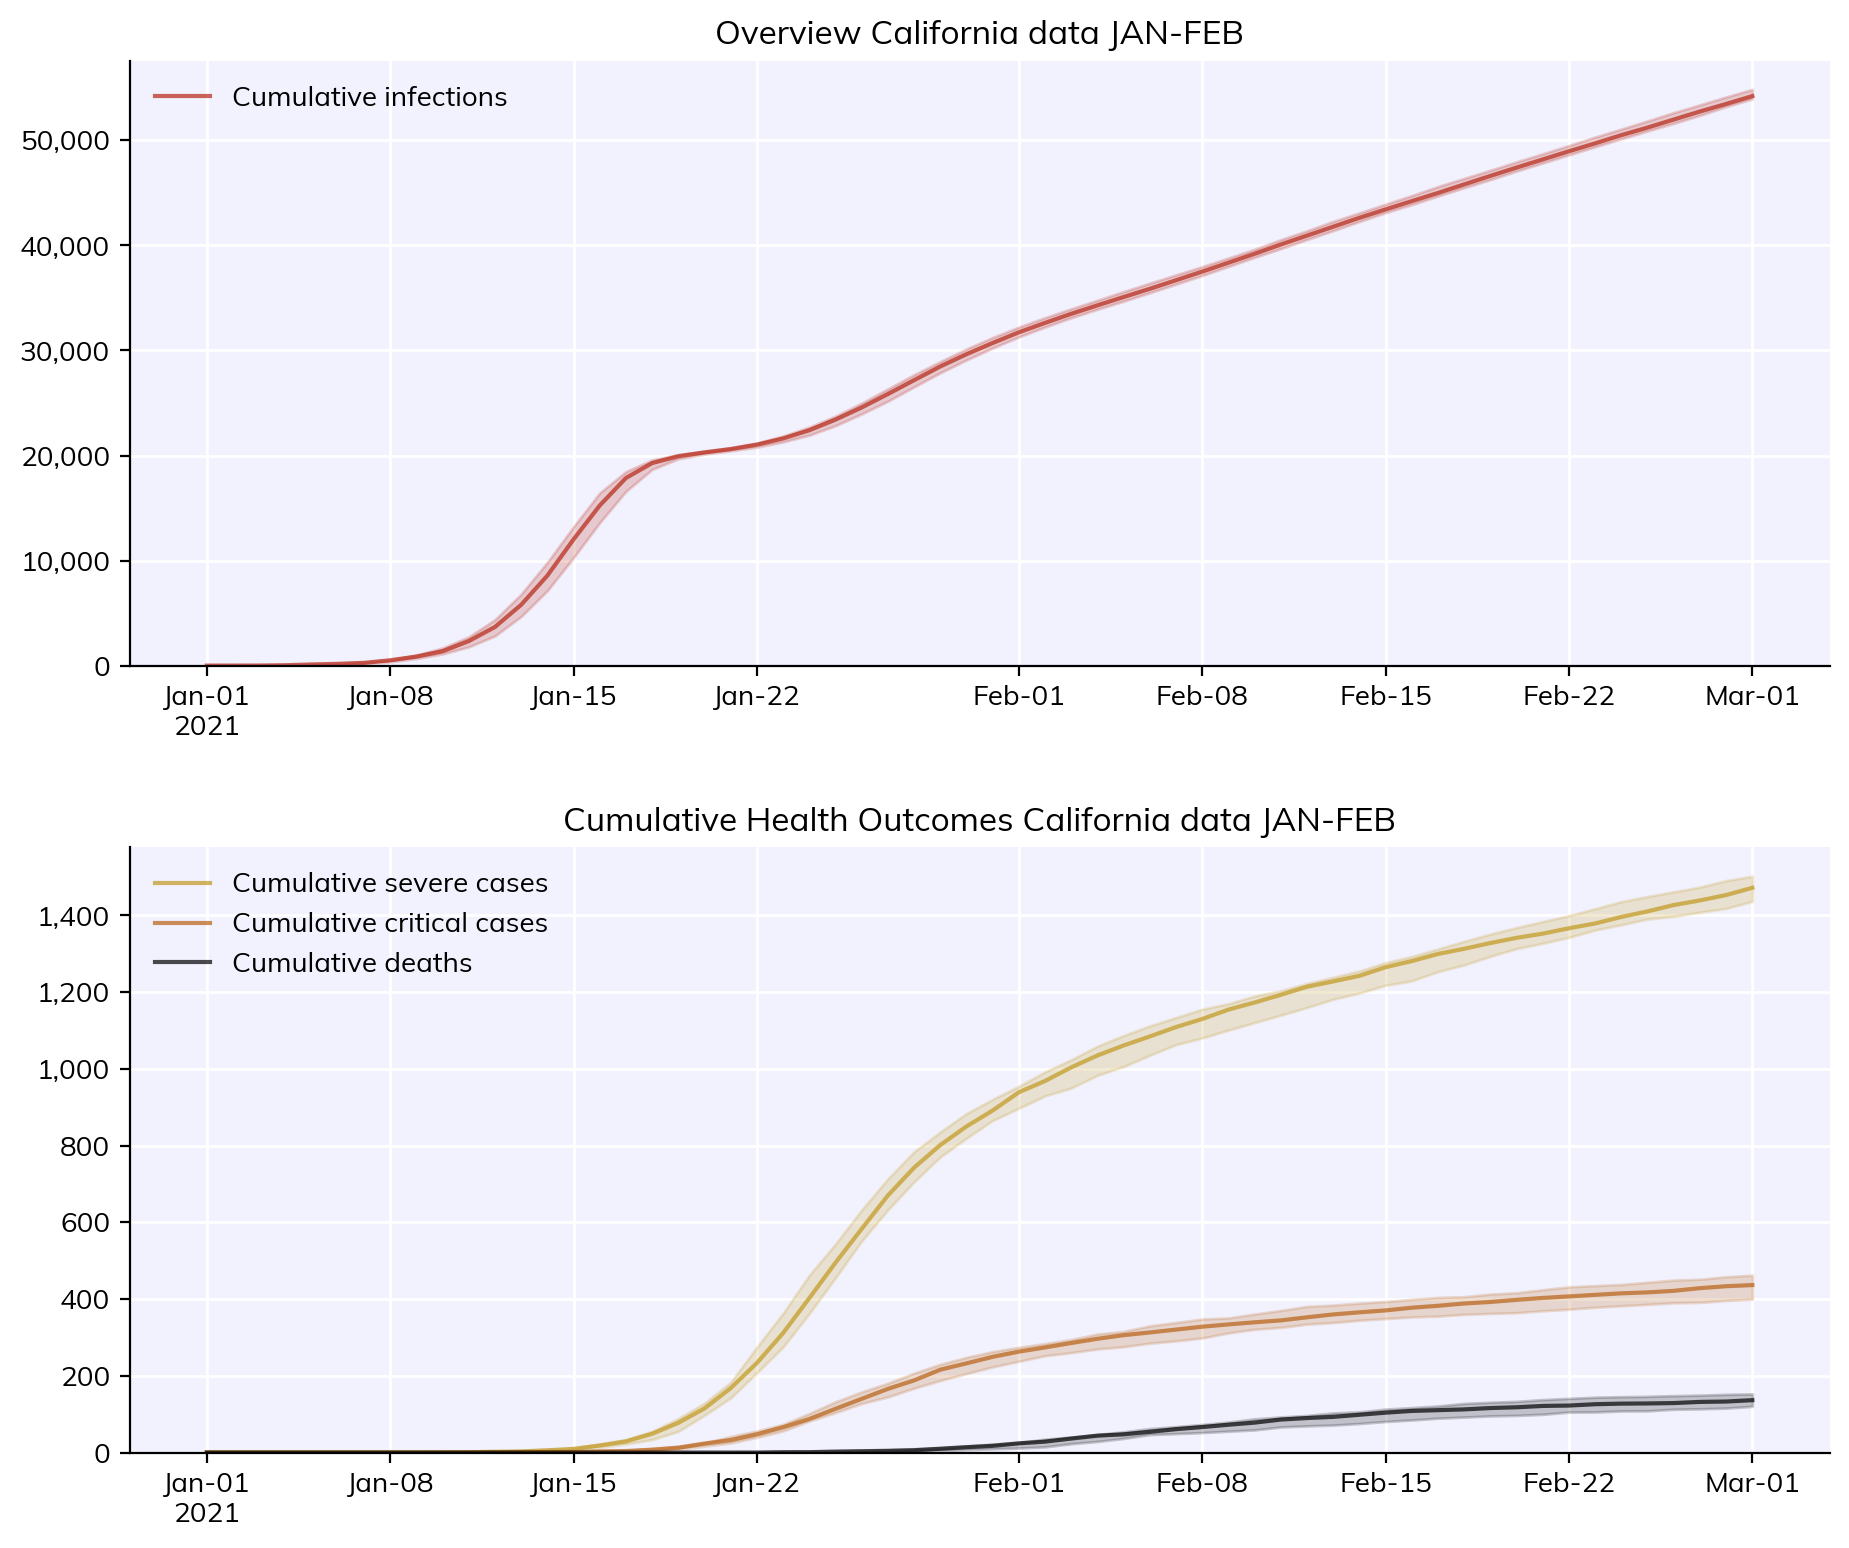

In [36]:
standard_msim.reset()
standard_msim.plot(plot_dict)
standard_msim.median()
standard_msim.plot(plot_dict)
standard_msim_median = standard_msim.base_sim

## Adding custom interventions

Non-pharmaceutical interventions

    Physical distancing
    Protective equipment
    Pharmaceutical interventions

Vaccination

Testing interventions
    
    Symptomatic & asymptomatic testing
    Isolation
    Contact tracing
    Quarantine




COVASIM allows you to do both inbuilt and custom interventions:

**Changing beta values** - Manually setting the probability of transmitions

**Testing interventions**
1. `test_num` performs the specified *number* of tests per day;
2. `test_prob` performs testing with the specified *probability*.

**Vaccination interventions**

**Contact tracing** - 

**Custom interventions** -  define an arbitrary function or class to act as an intervention

**Dynamic triggering** - replace the days arguments with custom functions defining additional criteria.


In [ ]:
# Do an example:

## Model calibrations

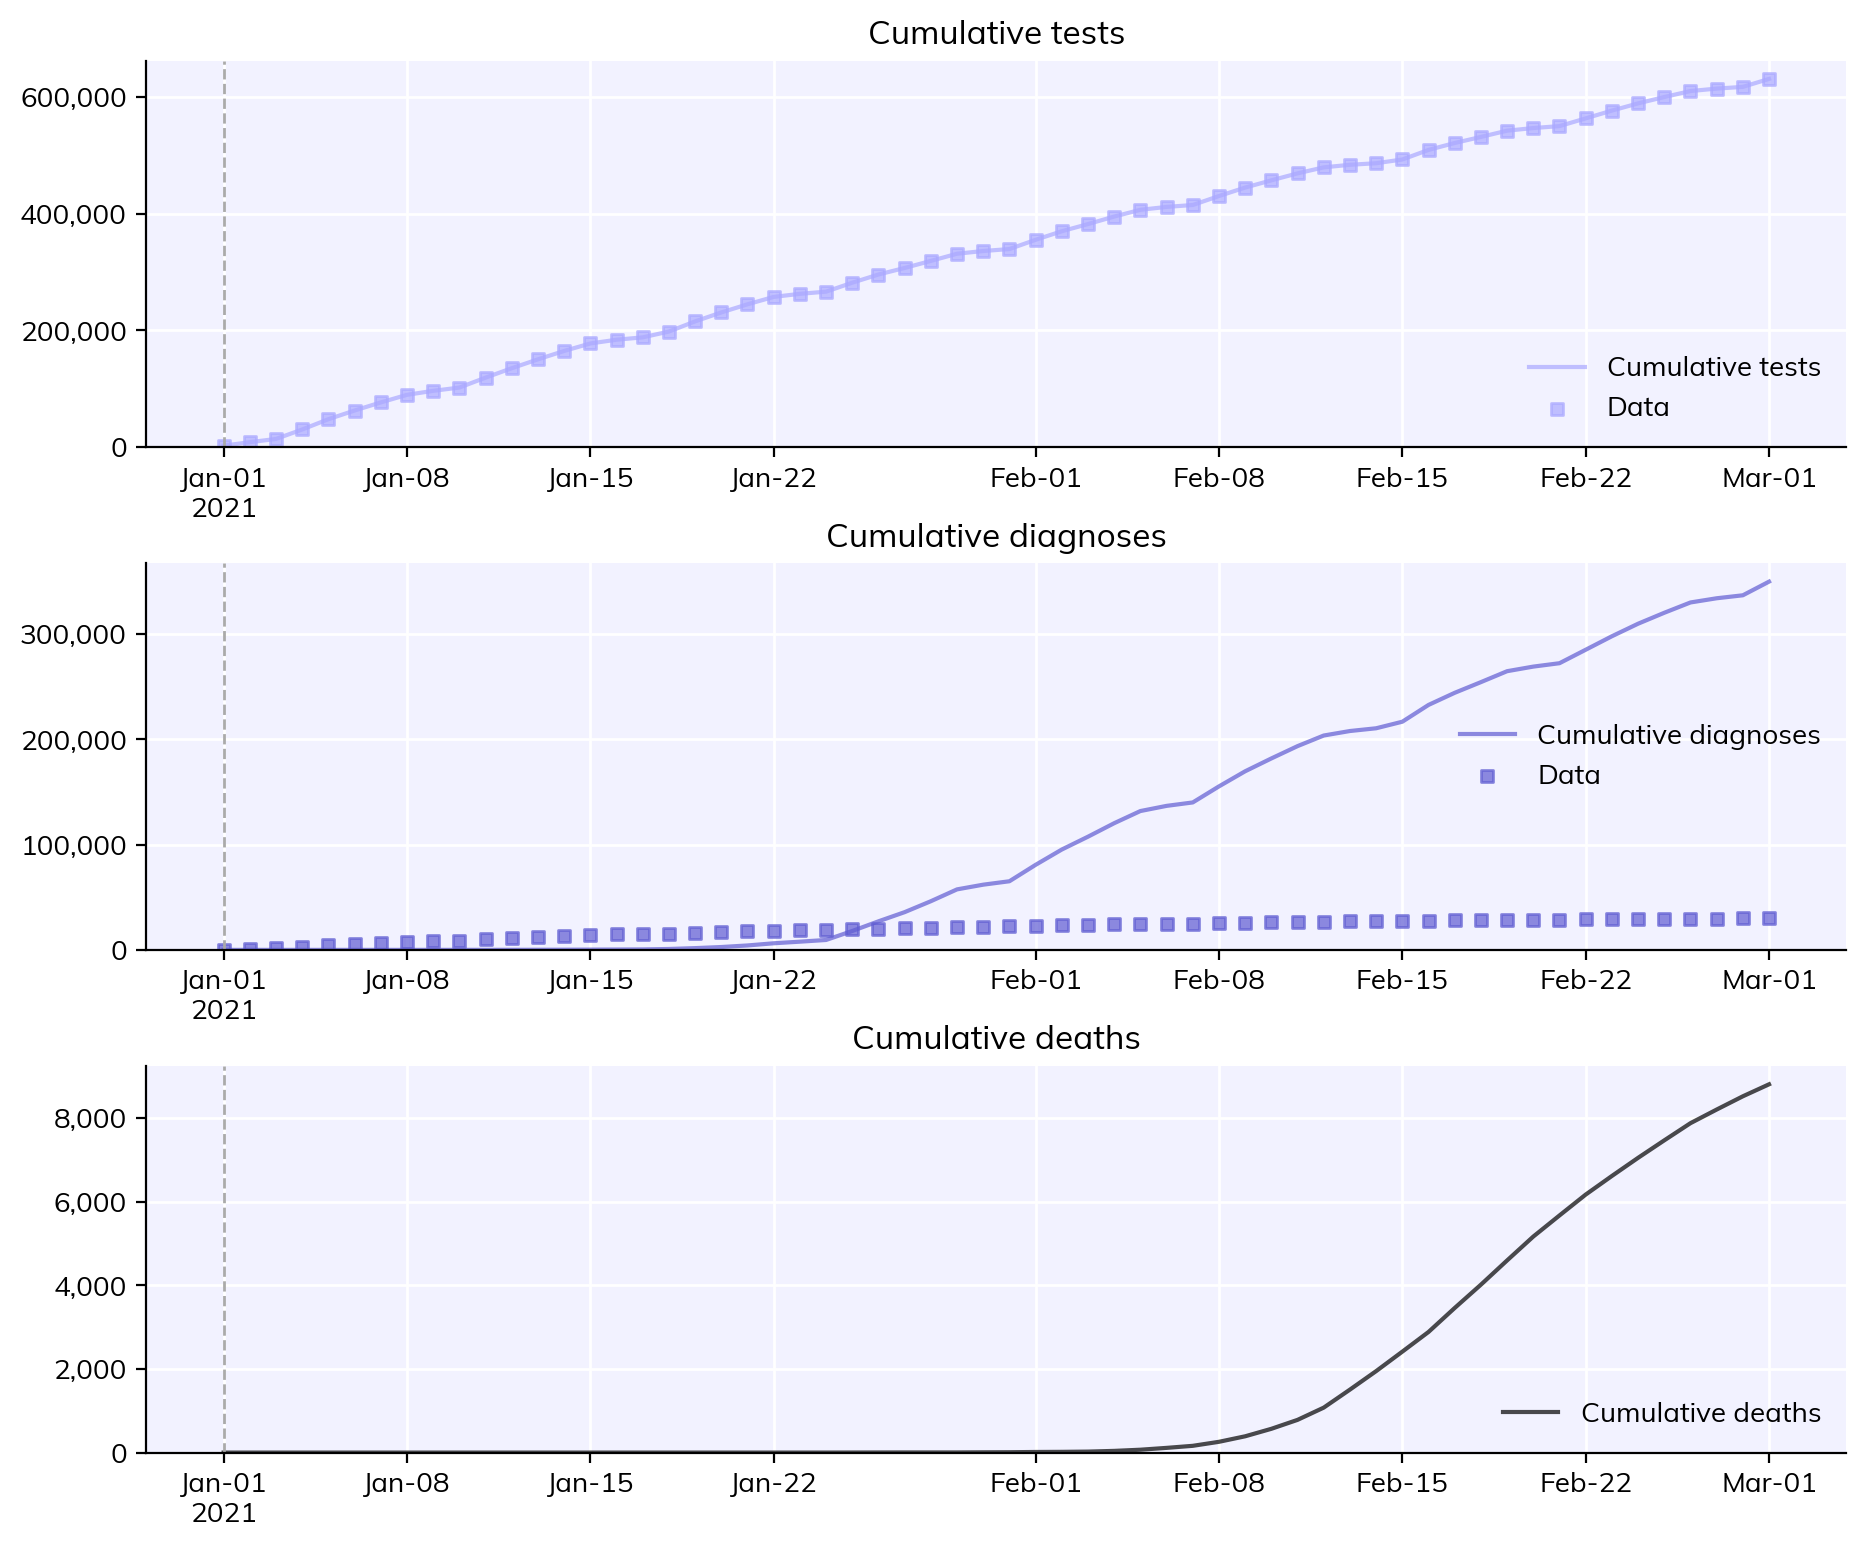

In [20]:
#Example run, with testing intervention using real california Alameda county data data:
    
import covasim as cv
cv.options(jupyter=True, verbose=0)

pars = dict(
    start_day = '2021-01-01',
    end_day   = '2021-03-01',
    beta      = 0.2,
    pop_size  = 1685886, # California-Alameda population is 1685886
    pop_type  = 'hybrid'
)
sim = cv.Sim(pars=pars, datafile='california_data/covid_county_alameda.csv', interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(['cum_tests', 'cum_diagnoses', 'cum_deaths'])

In [ ]:
#check the fit

In [21]:
fit = sim.compute_fit()
fit.summarize()

Mismatch values for:
#0. 'cum_tests':     0.0
#1. 'cum_diagnoses': 1009.6380942855238

Total mismatch value:
1009.6380942855238


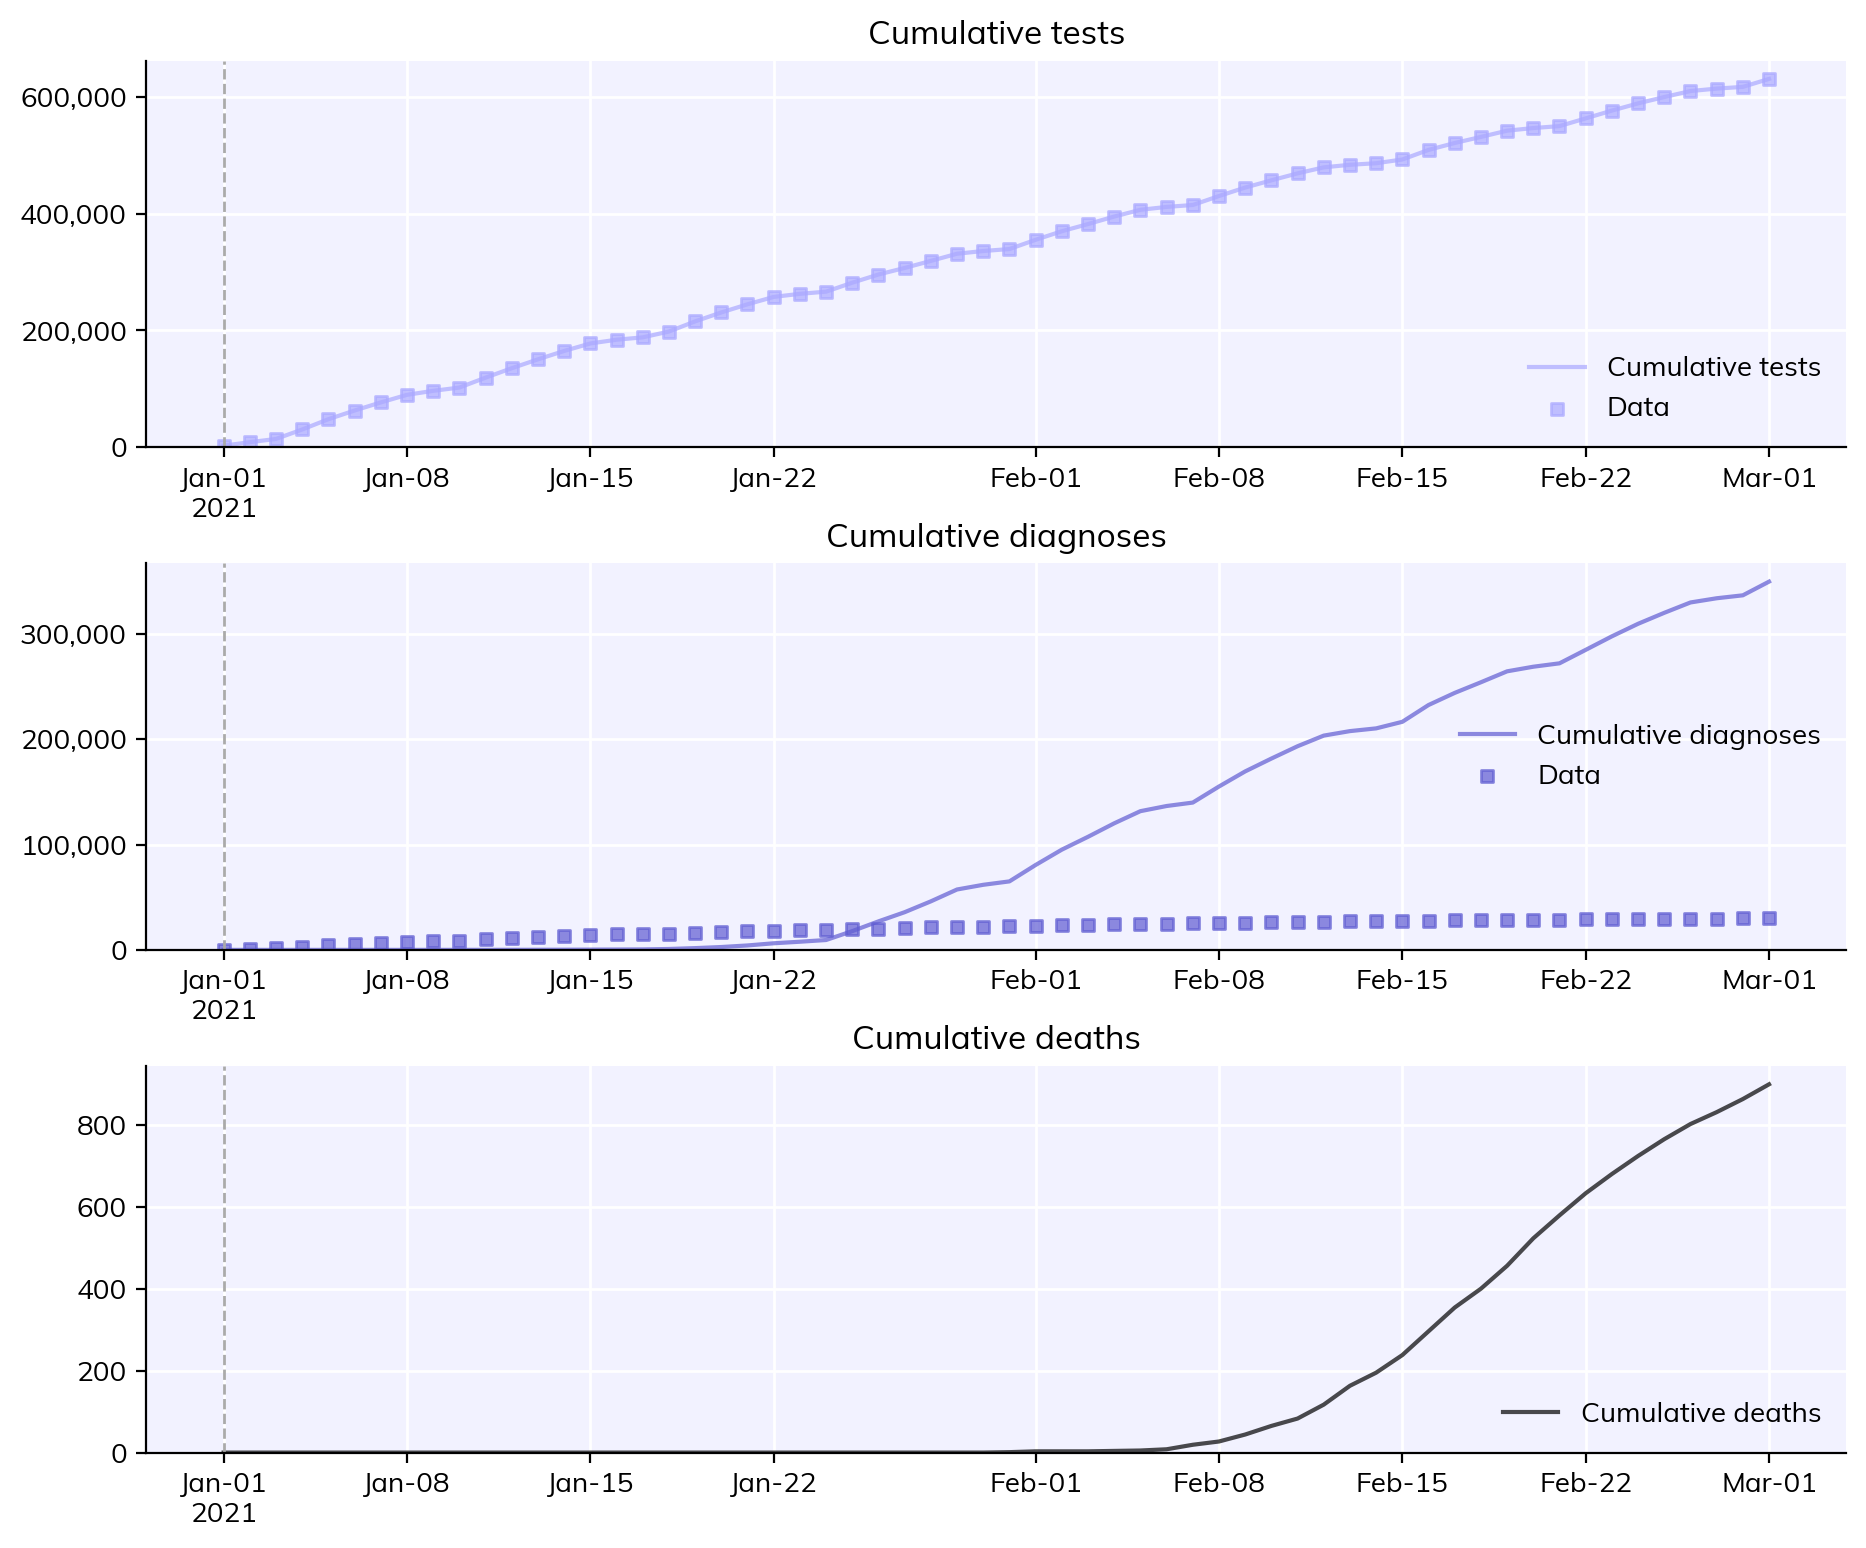

In [29]:
# Try to manually clibrate

sim['rel_death_prob'] = 0.1 # Reduce the death rate since deaths were too high
sim.initialize(reset=True) # Reinitialize the sim

# Rerun and compute fit
sim.run()
fit = sim.compute_fit()

# Output
sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])

In [30]:
fit = sim.compute_fit()
fit.summarize()

Mismatch values for:
#0. 'cum_tests':     0.0
#1. 'cum_diagnoses': 1008.6263919450555

Total mismatch value:
1008.6263919450555
